In [375]:
import numpy as np
import matplotlib.pyplot as plt

def generate_linear(n = 100):
    pts = np.random.uniform(0, 1, (n, 2))
    inputs = []
    labels = []
    for pt in pts:
        inputs.append([pt[0], pt[1]])
        distance = (pt[0] - pt[1]) / 1.414
        if pt[0] > pt[1]:
            labels.append(0)
        else:
            labels.append(1)
    return np.array(inputs), np.array(labels).reshape(n, 1)

def generate_XOR_easy():
    inputs = []
    labels = []
    for i in range(11):
        inputs.append([0.1 * i, 0.1 * i])
        labels.append(0)
        if 0.1 * i == 0.5:
            continue
        inputs.append([0.1 * i, 1 - 0.1 * i])
        labels.append(1)
    return np.array(inputs), np.array(labels).reshape(21, 1)

def generate_XOR_hard(fraction = 0.1):
    inputs = []
    labels = []
    for i in range(int(1 / fraction) + 1):
        inputs.append([fraction * i, fraction * i])
        labels.append(0)
        if i == int(0.5 / fraction):
            continue
        inputs.append([fraction * i, 1 - fraction * i])
        labels.append(1)
    return np.array(inputs), np.array(labels).reshape(int(2 / fraction) + 1, 1)

def show_result(x, y, pred_y):
    plt.figure(figsize = (15, 15))
    plt.subplot(2, 2, 3)
    plt.title('Ground Truth', fontsize = 18)
    for i in range(x.shape[0]):
        if y[i] == 0:
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')
            
    plt.subplot(2, 2, 4)
    plt.title('Predict Result', fontsize = 18)
    for i in range(x.shape[0]):
        if pred_y[i] <= 0.5:
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')
    plt.show()
    
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def derivative_sigmoid(x):
    return np.multiply(x, 1.0 - x)

def ReLU(x):
    return np.where(x > 0, x, 0)

def derivative_ReLU(x):
    return np.where(x > 0, 1, 0)

def MSE(y, y_hat):
    return np.sum((y - y_hat) ** 2) / y.shape[0]

def y_grad(y, y_hat):
    return 2 * (y - y_hat) / y.shape[0]

class layer:
    def __init__(self,input_size,output_size, activate = "none"):
        self.input_size = input_size
        self.output_size = output_size
        self.activate = activate
        self.gradient = 0
        self.w = np.random.normal(-1, 1, (input_size, output_size))
        self.b = np.random.normal(-1, 1, (1, output_size))
        self.a = []
        self.z = []

    def forward(self, x):
        self.x = x
        self.a = np.dot(x,self.w) + self.b
        if(self.activate == "sigmoid"):
            self.z = sigmoid(self.a)
        elif(self.activate == "ReLU"):
            self.z = ReLU(self.a)
        else:
            self.z = self.a
    
    def back(self, gradient, learning_rate): 
        if self.activate == "sigmoid":
            gradient *= derivative_sigmoid(self.z)
        elif self.activate == "ReLU":
            gradient *= derivative_ReLU(self.z)
        else:
            gradient *= np.ones(self.z.shape)

        self.w -= learning_rate * np.dot(self.x.T, gradient)
        self.b -= learning_rate * np.sum(gradient, axis = 0)
        self.gradient = np.dot(gradient, self.w.T)

class MLP:
    def __init__(self, hidden_size = 5, learning_rate = 0.5, activate = "none"):
        self.learning_rate = learning_rate
        self.hidden1 = layer(2, hidden_size, activate)
        self.hidden2 = layer(hidden_size, hidden_size, activate)
        self.output = layer(hidden_size, 1, activate)
        self.loss = []

    def train(self, x, ground_truth, epoch = 100000):
        plt.figure(figsize = (30, 30))
        plt.subplot(2, 1, 1)
        plt.title('Learning Curves', fontsize = 30)
        plt.xlabel('epoch', fontsize = 30)
        plt.ylabel('loss', fontsize = 30)
        for i in range(epoch):
            self.hidden1.forward(x)
            self.hidden2.forward(self.hidden1.z)
            self.output.forward(self.hidden2.z)

            loss, gradient = self.cost(ground_truth)
            self.loss.append(loss)
            if not i % 5000:
                print("epoch ", i, " loss : ", loss)

            self.output.back(gradient, self.learning_rate)
            self.hidden2.back(self.output.gradient, self.learning_rate)
            self.hidden1.back(self.hidden2.gradient, self.learning_rate)
        plt.plot(self.loss)
        
        show_result(x, ground_truth, self.output.z)
        for i in range(ground_truth.size):
            print("Iter", i + 1," |    Ground truth: ", ground_truth[i], " |   prediction: ", self.output.z[i], " |")
        print("loss=", loss, " accuracy=", 100 * sum((self.output.z > 0.5) == (ground_truth == 1)) / ground_truth.size, "%")
            
    def cost(self, y_hat):
        return MSE(self.output.z, y_hat), y_grad(self.output.z, y_hat)
    
    def test(self, x, ground_truth):
        self.hidden1.forward(x)
        self.hidden2.forward(self.hidden1.z)
        self.output.forward(self.hidden2.z)
        loss, grad = self.cost(ground_truth)
        print("  ===== testing set =====  ")
        show_result(x, ground_truth, self.output.z)
        for i in range(ground_truth.size):
            print("Iter", i + 1," |    Ground truth: ", ground_truth[i], " |   prediction: ", self.output.z[i], " |")
        print("loss=", loss, " accuracy=", 100 * sum((self.output.z > 0.5) == (ground_truth == 1)) / ground_truth.size, "%")
        

epoch  0  loss :  0.24690482315996018
epoch  5000  loss :  0.06342761666041441
epoch  10000  loss :  0.032775056947489674
epoch  15000  loss :  0.022562745735765593
epoch  20000  loss :  0.01811982998887548
epoch  25000  loss :  0.01508472594686457
epoch  30000  loss :  0.012479297116790201
epoch  35000  loss :  0.010704207213910888
epoch  40000  loss :  0.009375321690969432
epoch  45000  loss :  0.008182317709930864
epoch  50000  loss :  0.007631093336929566
epoch  55000  loss :  0.009670823249976779
epoch  60000  loss :  0.01105661179030669
epoch  65000  loss :  0.007196316526213435
epoch  70000  loss :  0.020622462444369882
epoch  75000  loss :  0.01967105082268587
epoch  80000  loss :  0.005640819062498559
epoch  85000  loss :  0.004595670475438551
epoch  90000  loss :  0.0049911820968742875
epoch  95000  loss :  0.003731706073128478


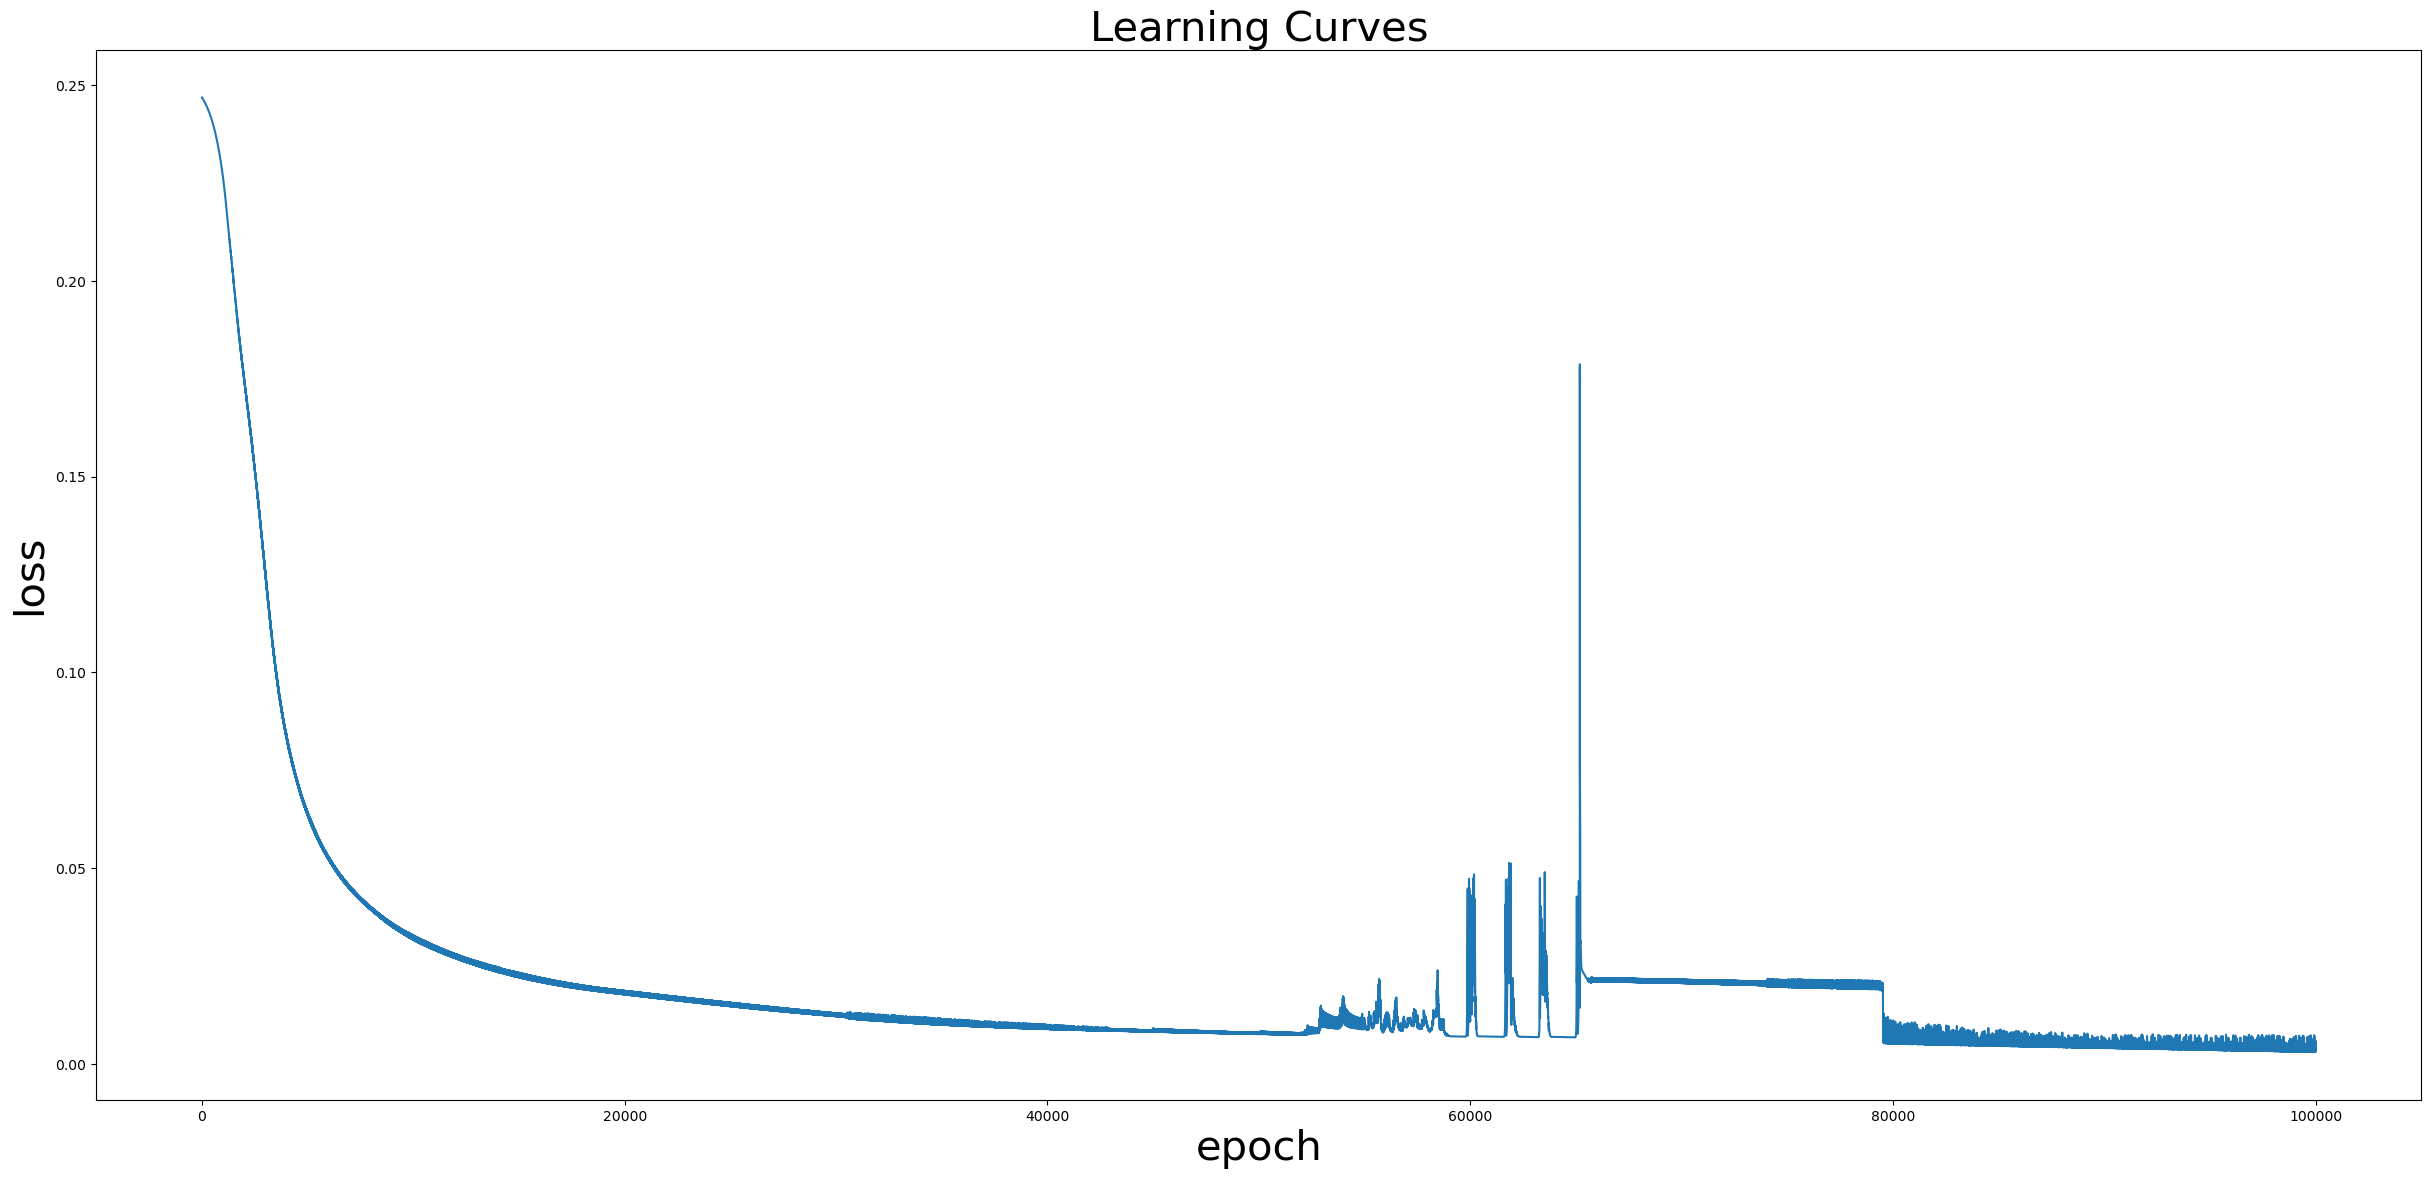

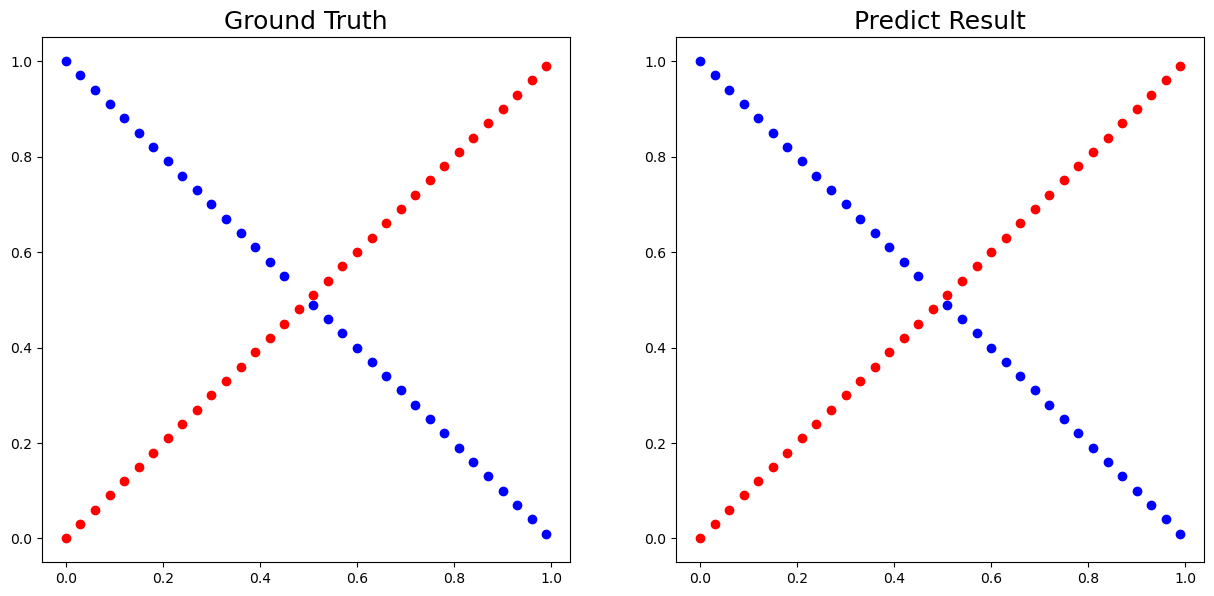

Iter 1  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 2  |    Ground truth:  [1]  |   prediction:  [0.99986188]  |
Iter 3  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 4  |    Ground truth:  [1]  |   prediction:  [0.99986109]  |
Iter 5  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 6  |    Ground truth:  [1]  |   prediction:  [0.9998603]  |
Iter 7  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 8  |    Ground truth:  [1]  |   prediction:  [0.99985951]  |
Iter 9  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 10  |    Ground truth:  [1]  |   prediction:  [0.99985872]  |
Iter 11  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 12  |    Ground truth:  [1]  |   prediction:  [0.99985793]  |
Iter 13  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 14  |    Ground truth:  [1]  |   prediction:  [0.99985714]  |
Iter 15  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 16  |    Ground truth:  [1]  |   prediction:  [0.99985635]  |
It

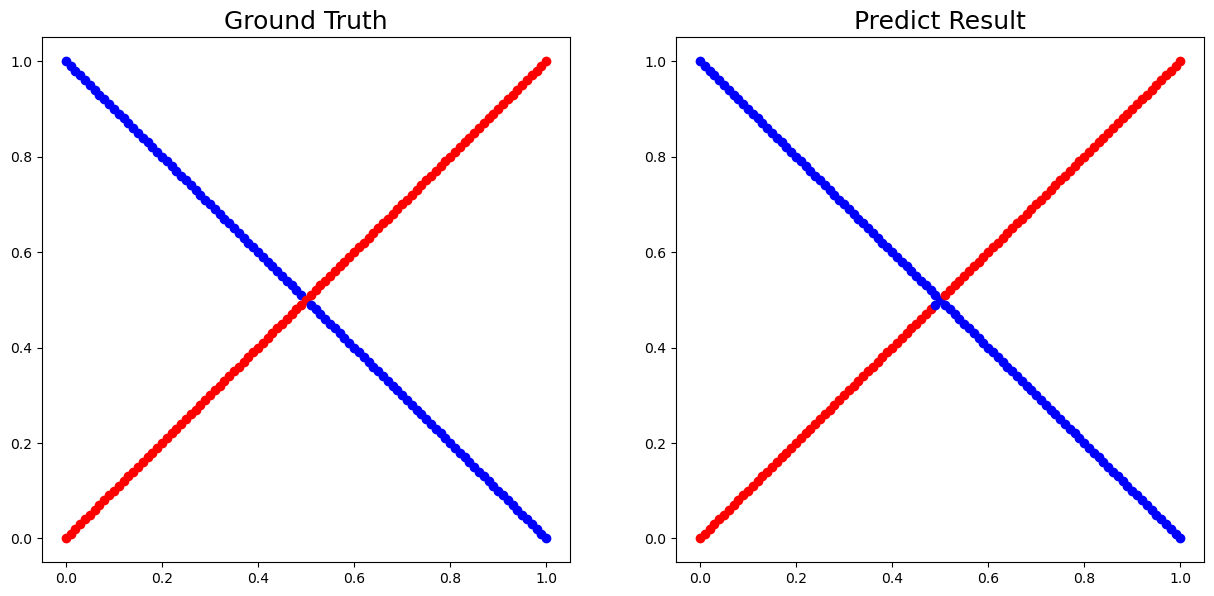

Iter 1  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 2  |    Ground truth:  [1]  |   prediction:  [0.93440867]  |
Iter 3  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 4  |    Ground truth:  [1]  |   prediction:  [0.93439403]  |
Iter 5  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 6  |    Ground truth:  [1]  |   prediction:  [0.93437938]  |
Iter 7  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 8  |    Ground truth:  [1]  |   prediction:  [0.93436473]  |
Iter 9  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 10  |    Ground truth:  [1]  |   prediction:  [0.93435008]  |
Iter 11  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 12  |    Ground truth:  [1]  |   prediction:  [0.93433543]  |
Iter 13  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 14  |    Ground truth:  [1]  |   prediction:  [0.93432078]  |
Iter 15  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 16  |    Ground truth:  [1]  |   prediction:  [0.93430613]  |
I

In [93]:
x2, y2 = generate_XOR_hard(fraction = 0.03)
model = MLP(hidden_size = 5,activate = "ReLU", learning_rate = 0.01)
model.train(x2, y2, epoch = 100000)
testx, testy = generate_XOR_hard(fraction = 0.01)
model.test(testx, testy)

epoch  0  loss :  0.35394617154275465
epoch  5000  loss :  0.16765709941035759
epoch  10000  loss :  0.129729779262648
epoch  15000  loss :  0.1277956251986884
epoch  20000  loss :  0.12391658357295195
epoch  25000  loss :  0.004920667752262759
epoch  30000  loss :  8.83098184094485e-05
epoch  35000  loss :  1.6946224203004954e-06
epoch  40000  loss :  6.06374220010973e-08
epoch  45000  loss :  2.7204688678344386e-09
epoch  50000  loss :  1.2179354552404091e-10
epoch  55000  loss :  5.45016245481435e-12
epoch  60000  loss :  2.438671444015708e-13
epoch  65000  loss :  1.0911598945487053e-14
epoch  70000  loss :  4.882268495991474e-16
epoch  75000  loss :  2.184512722990183e-17
epoch  80000  loss :  9.774347531488838e-19
epoch  85000  loss :  4.373413193427787e-20
epoch  90000  loss :  1.956902835799166e-21
epoch  95000  loss :  8.761957257787905e-23
epoch  100000  loss :  3.942356874312175e-24
epoch  105000  loss :  1.834050874543586e-25
epoch  110000  loss :  1.0618764494017748e-26
ep

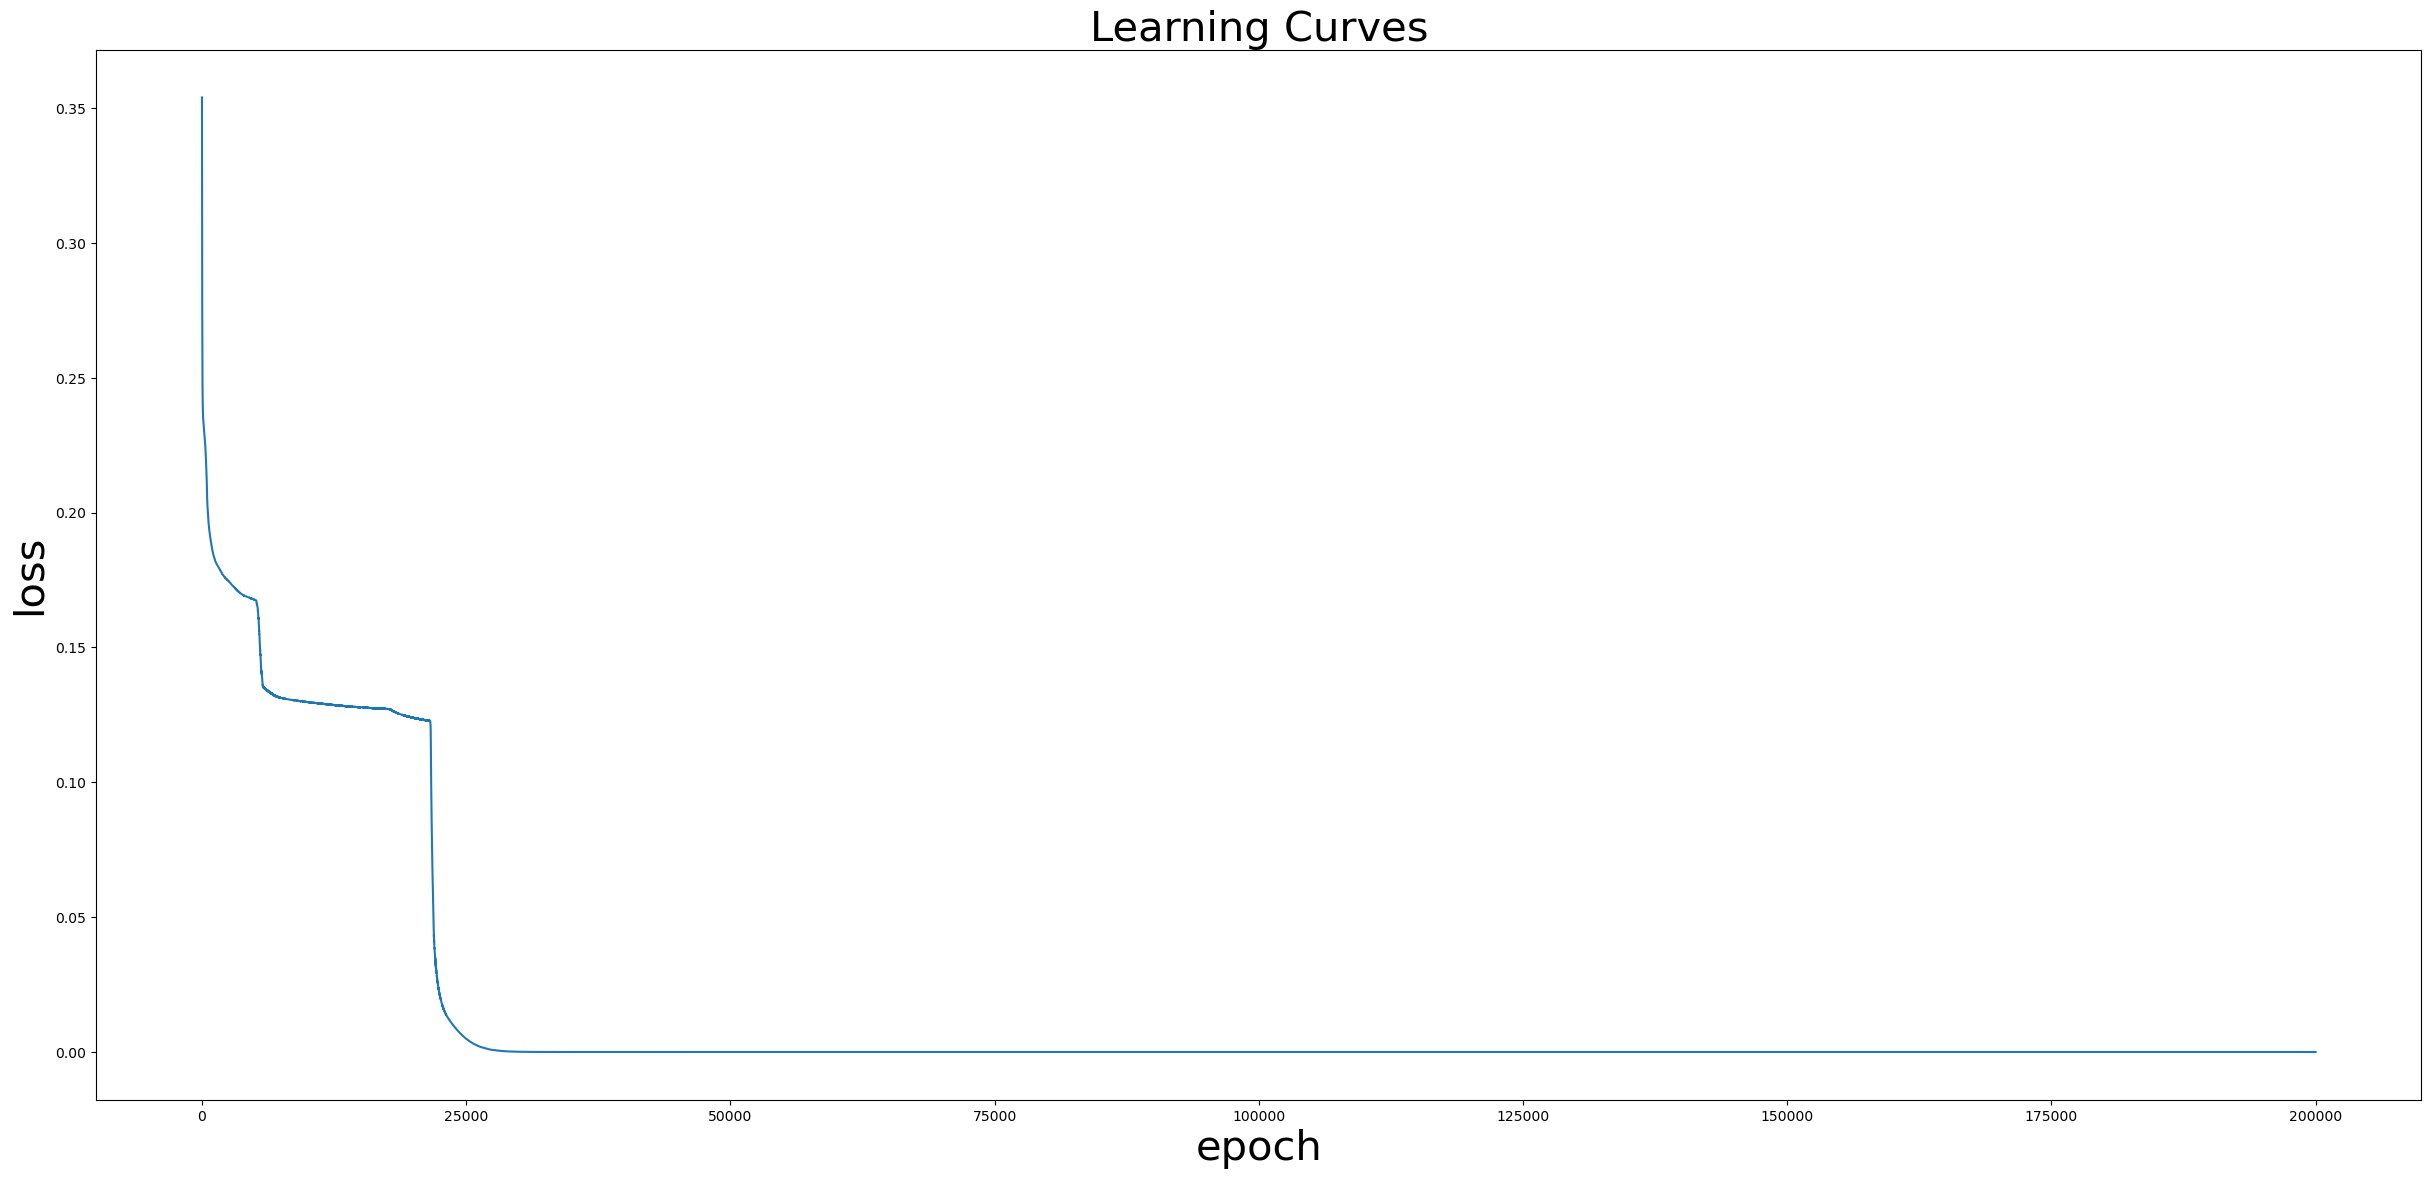

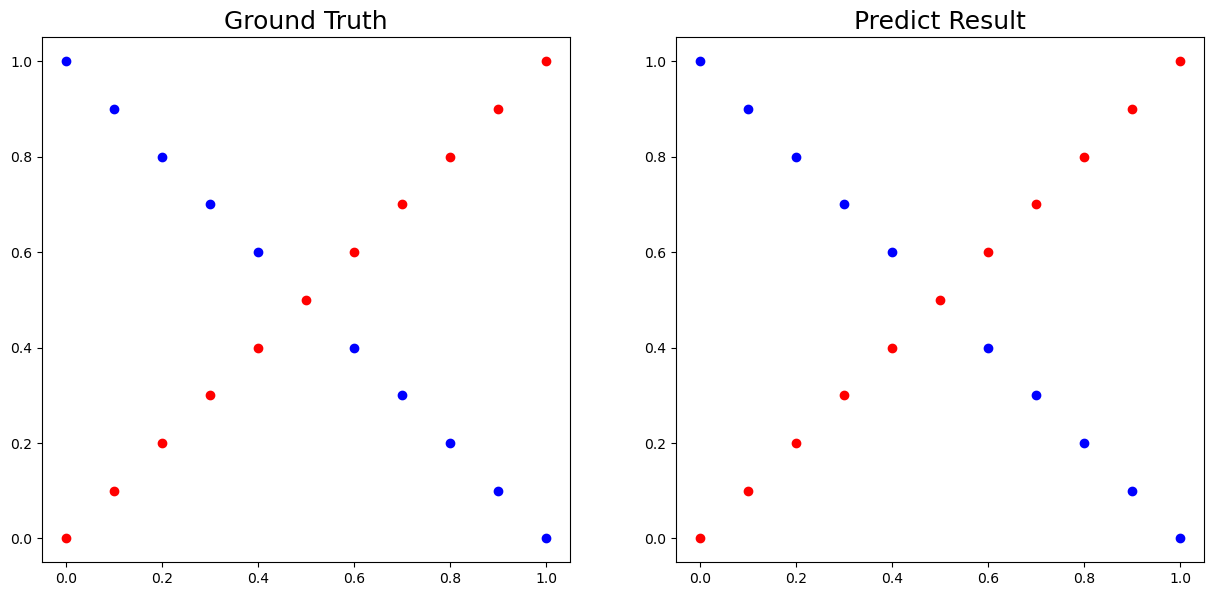

Iter 1  |    Ground truth:  [0]  |   prediction:  [5.20694599e-14]  |
Iter 2  |    Ground truth:  [1]  |   prediction:  [1.]  |
Iter 3  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 4  |    Ground truth:  [1]  |   prediction:  [1.]  |
Iter 5  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 6  |    Ground truth:  [1]  |   prediction:  [1.]  |
Iter 7  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 8  |    Ground truth:  [1]  |   prediction:  [1.]  |
Iter 9  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 10  |    Ground truth:  [1]  |   prediction:  [1.]  |
Iter 11  |    Ground truth:  [0]  |   prediction:  [2.87769808e-13]  |
Iter 12  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 13  |    Ground truth:  [1]  |   prediction:  [1.]  |
Iter 14  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 15  |    Ground truth:  [1]  |   prediction:  [1.]  |
Iter 16  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 17  |    Ground truth:  [1]  |   pre

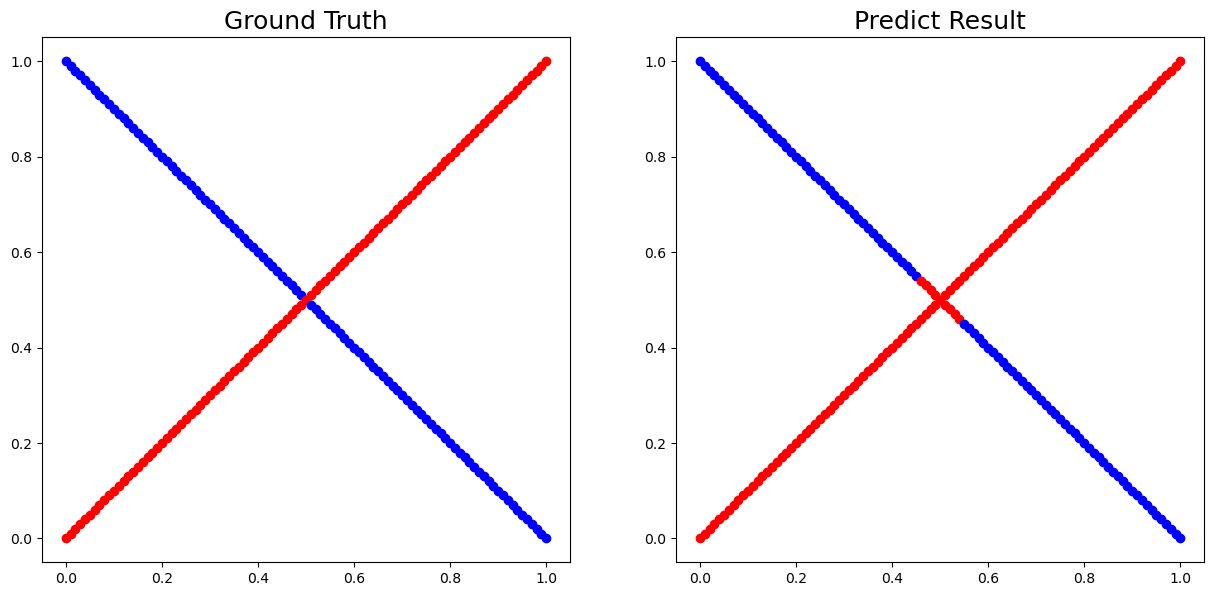

Iter 1  |    Ground truth:  [0]  |   prediction:  [5.20694599e-14]  |
Iter 2  |    Ground truth:  [1]  |   prediction:  [1.]  |
Iter 3  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 4  |    Ground truth:  [1]  |   prediction:  [1.]  |
Iter 5  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 6  |    Ground truth:  [1]  |   prediction:  [1.]  |
Iter 7  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 8  |    Ground truth:  [1]  |   prediction:  [1.]  |
Iter 9  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 10  |    Ground truth:  [1]  |   prediction:  [1.]  |
Iter 11  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 12  |    Ground truth:  [1]  |   prediction:  [1.]  |
Iter 13  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 14  |    Ground truth:  [1]  |   prediction:  [1.]  |
Iter 15  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 16  |    Ground truth:  [1]  |   prediction:  [1.]  |
Iter 17  |    Ground truth:  [0]  |   prediction:  [0

In [94]:
x2, y2 = generate_XOR_easy()
model = MLP(hidden_size = 4,activate = "ReLU", learning_rate = 0.01)
model.train(x2, y2, epoch = 200000)
testx, testy = generate_XOR_hard(fraction = 0.01)
model.test(testx, testy)

epoch  0  loss :  0.3185071594471354
epoch  5000  loss :  0.00014735760664381003
epoch  10000  loss :  4.3231818428404705e-06
epoch  15000  loss :  1.0099248496036206e-07
epoch  20000  loss :  2.2411264207910563e-09
epoch  25000  loss :  4.934692852376143e-11
epoch  30000  loss :  1.0853016385123152e-12
epoch  35000  loss :  2.386525631165138e-14
epoch  40000  loss :  5.247720159691725e-16
epoch  45000  loss :  1.1539141056945923e-17
epoch  50000  loss :  2.537322620620871e-19
epoch  55000  loss :  5.5793970534280544e-21
epoch  60000  loss :  1.2269975502119043e-22
epoch  65000  loss :  2.701198025930613e-24
epoch  70000  loss :  6.045623715139023e-26
epoch  75000  loss :  1.9461323023913968e-27
epoch  80000  loss :  1.9470115125221687e-27
epoch  85000  loss :  1.9470054728058632e-27
epoch  90000  loss :  1.9470115125221687e-27
epoch  95000  loss :  1.9470115125221687e-27


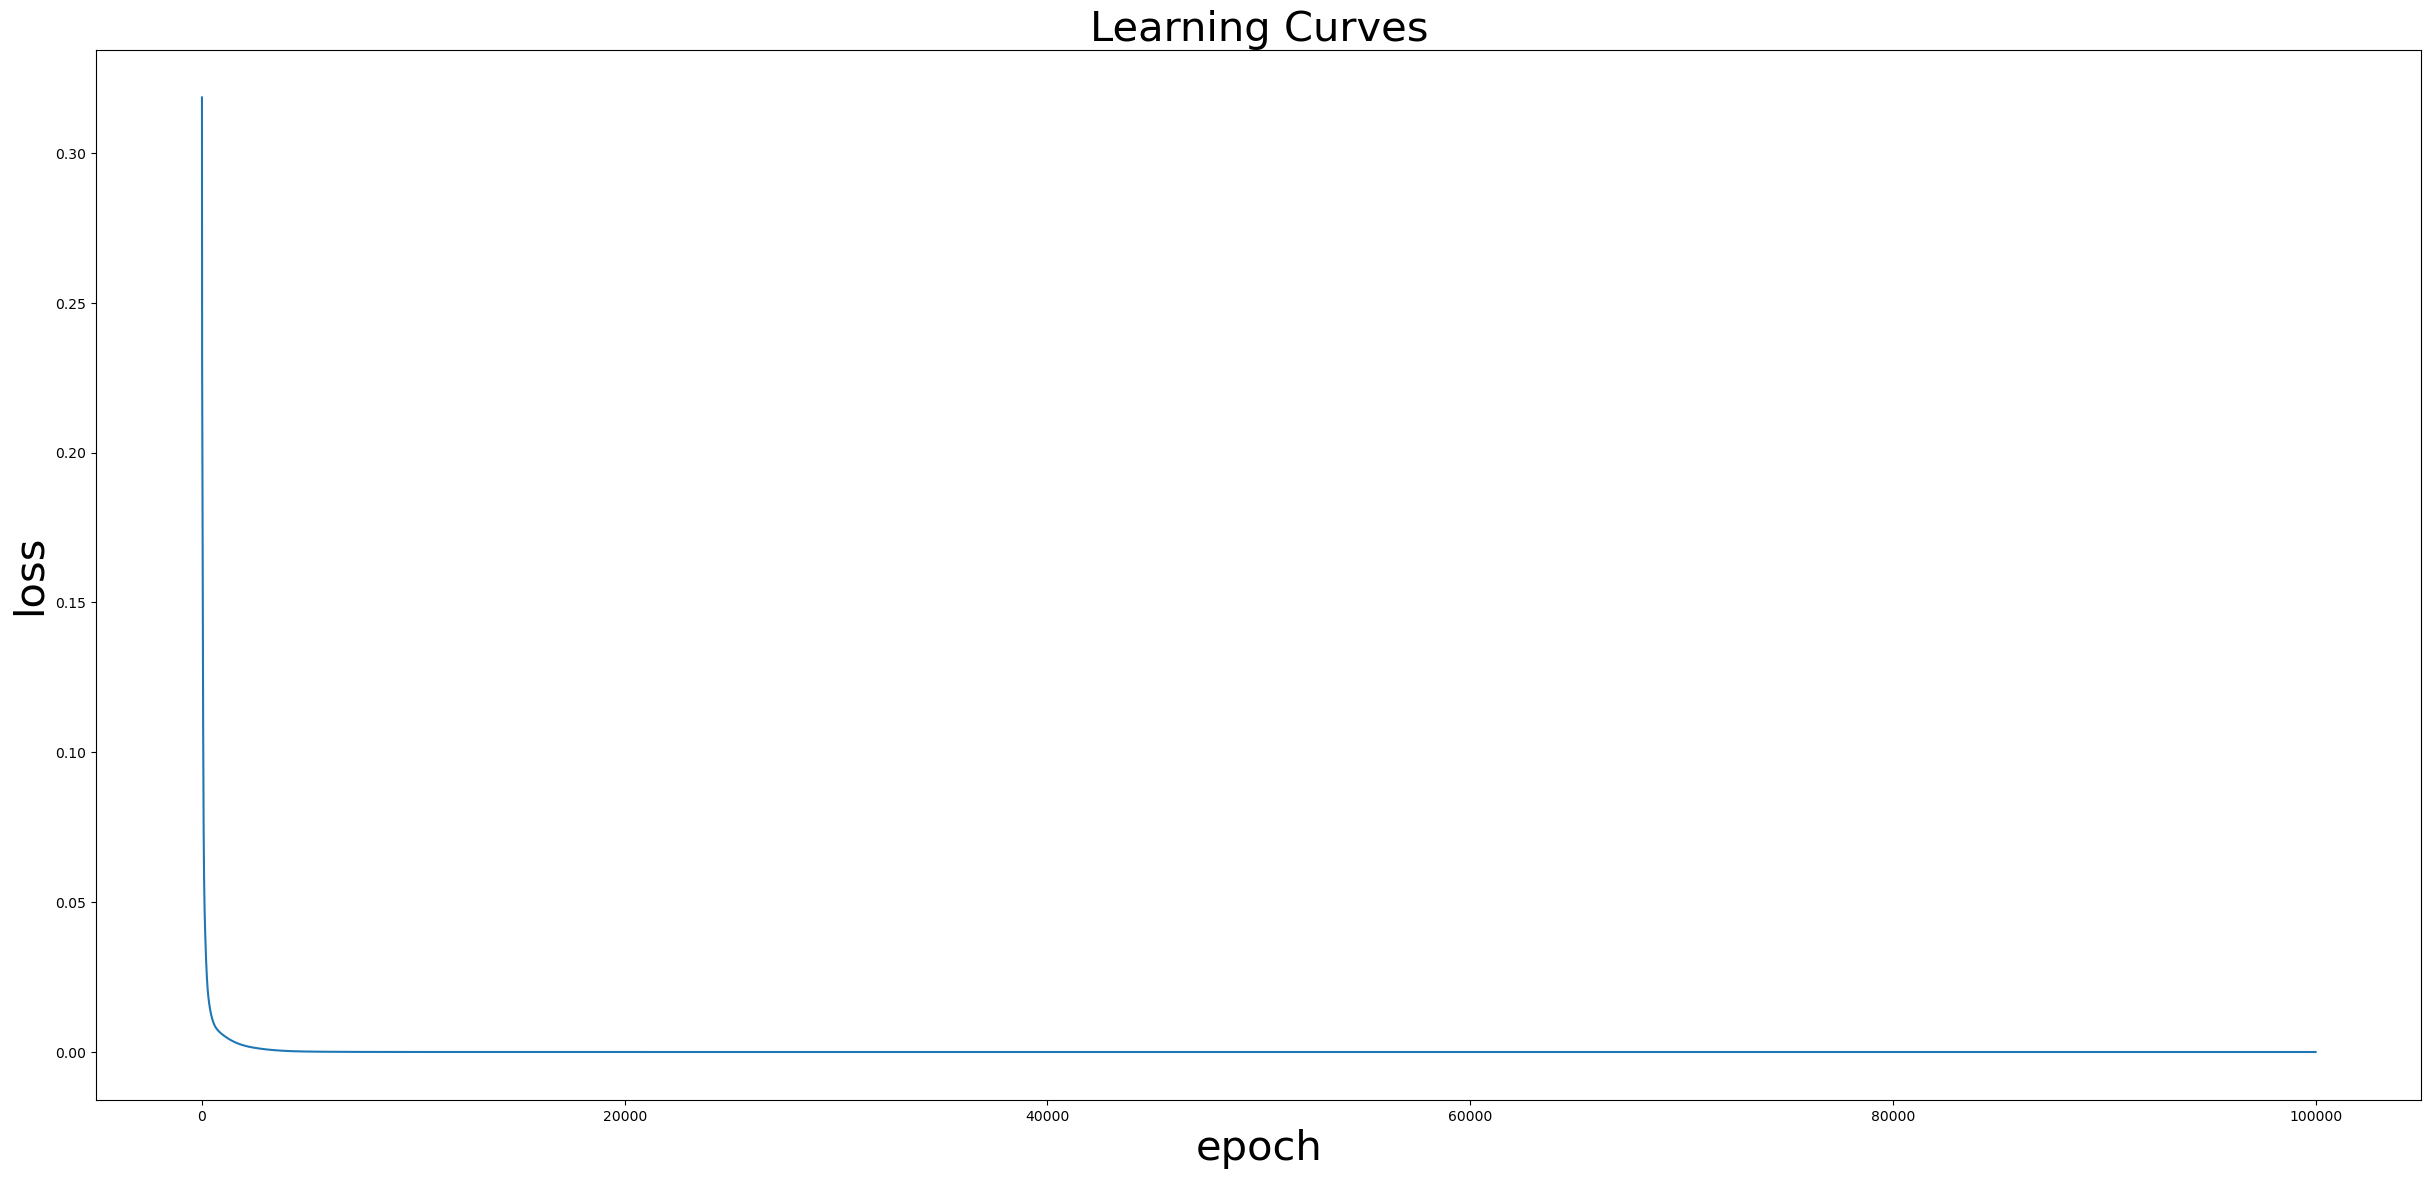

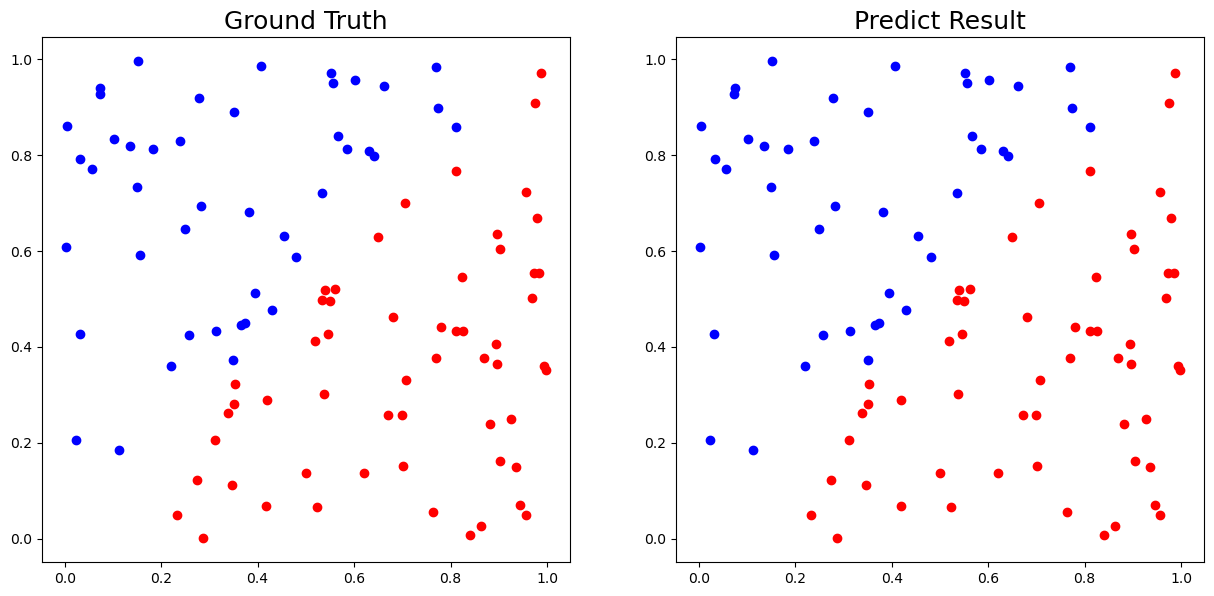

Iter 1  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 2  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 3  |    Ground truth:  [1]  |   prediction:  [1.]  |
Iter 4  |    Ground truth:  [1]  |   prediction:  [1.]  |
Iter 5  |    Ground truth:  [1]  |   prediction:  [1.]  |
Iter 6  |    Ground truth:  [1]  |   prediction:  [1.]  |
Iter 7  |    Ground truth:  [1]  |   prediction:  [1.]  |
Iter 8  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 9  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 10  |    Ground truth:  [1]  |   prediction:  [1.]  |
Iter 11  |    Ground truth:  [1]  |   prediction:  [1.]  |
Iter 12  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 13  |    Ground truth:  [1]  |   prediction:  [1.]  |
Iter 14  |    Ground truth:  [0]  |   prediction:  [3.47943896e-13]  |
Iter 15  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 16  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 17  |    Ground truth:  [1]  |   prediction:  [1

In [112]:
x2, y2 = generate_linear()
model = MLP(hidden_size = 2,activate = "ReLU", learning_rate = 0.1)
model.train(x2, y2, epoch = 100000)

epoch  0  loss :  2.777253850574109
epoch  5000  loss :  0.04435611895868108
epoch  10000  loss :  0.029009299040473478
epoch  15000  loss :  0.01922600850829182
epoch  20000  loss :  0.01079963190727733
epoch  25000  loss :  0.003328773687635289
epoch  30000  loss :  0.0005179445354492696
epoch  35000  loss :  5.4792939893598795e-05
epoch  40000  loss :  1.8500946222901952e-06
epoch  45000  loss :  2.5713404305531004e-08
epoch  50000  loss :  3.6251884289541887e-10
epoch  55000  loss :  4.995154407491181e-12
epoch  60000  loss :  6.811561241274081e-14
epoch  65000  loss :  9.647461334321907e-16
epoch  70000  loss :  1.3330858350417206e-17
epoch  75000  loss :  1.8527680946696747e-19
epoch  80000  loss :  2.589896886945452e-21
epoch  85000  loss :  3.599776512568734e-23
epoch  90000  loss :  4.986596781586126e-25
epoch  95000  loss :  8.843069117769322e-27


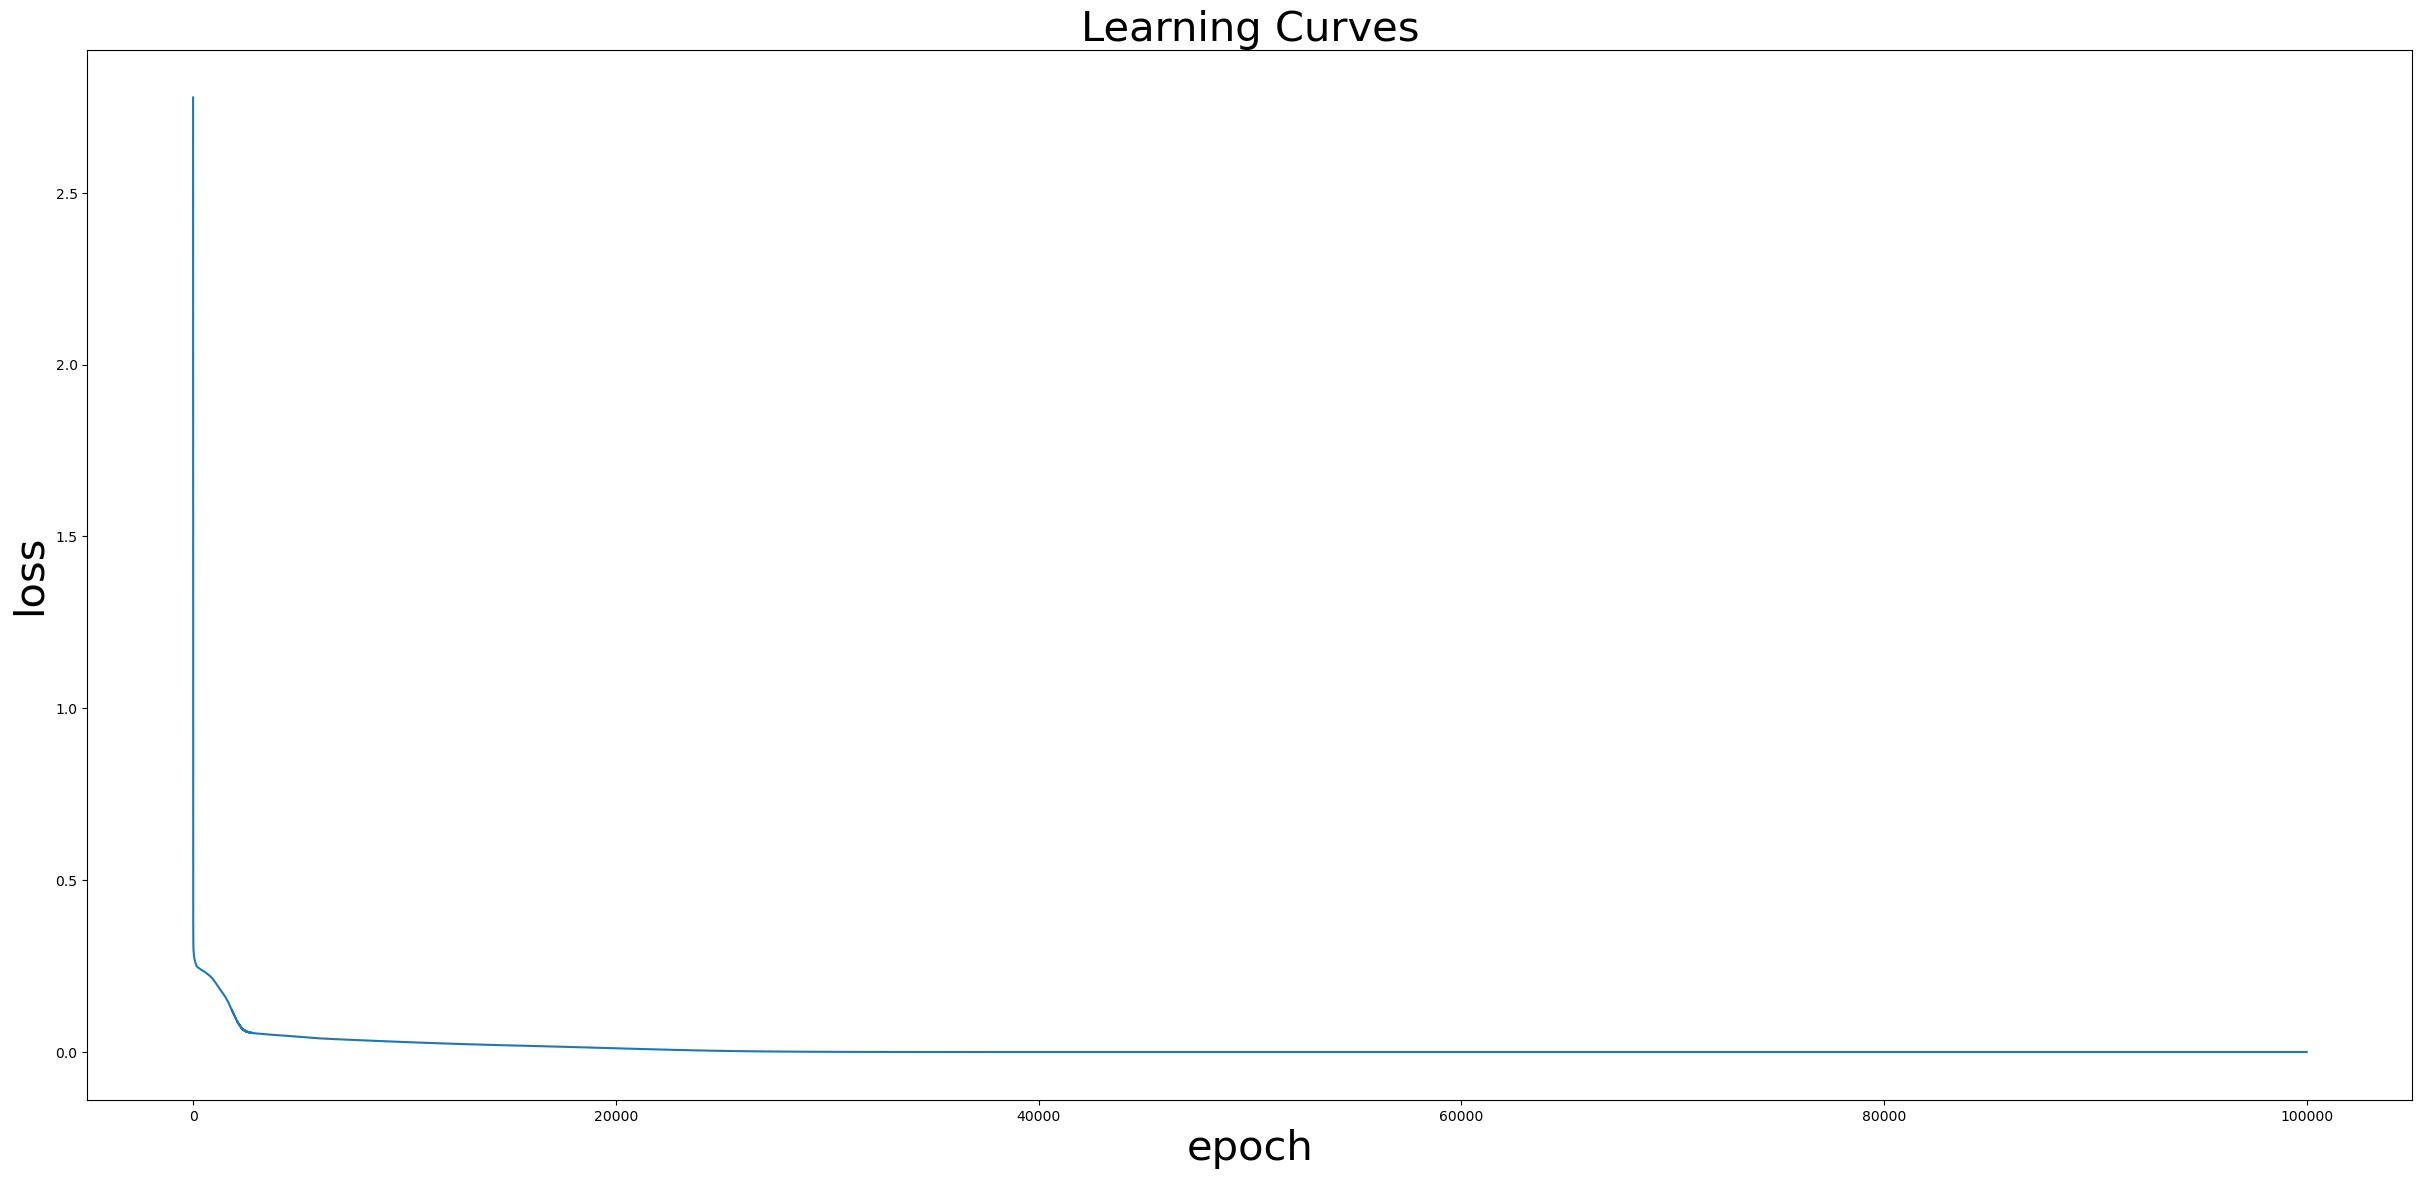

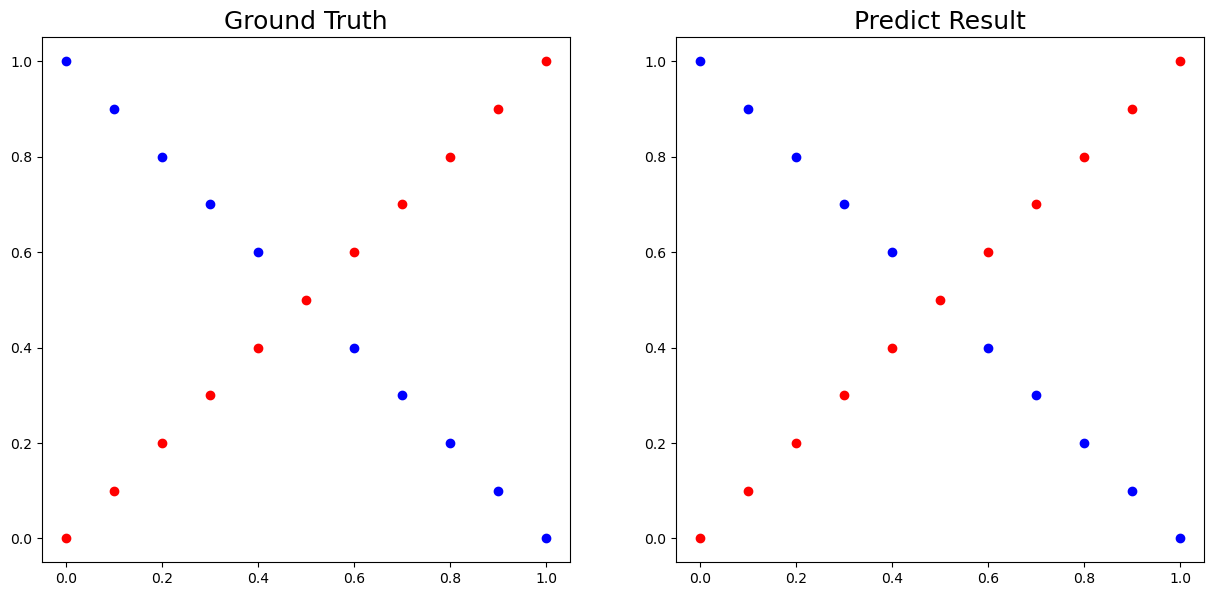

Iter 1  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 2  |    Ground truth:  [1]  |   prediction:  [1.]  |
Iter 3  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 4  |    Ground truth:  [1]  |   prediction:  [1.]  |
Iter 5  |    Ground truth:  [0]  |   prediction:  [6.99440506e-15]  |
Iter 6  |    Ground truth:  [1]  |   prediction:  [1.]  |
Iter 7  |    Ground truth:  [0]  |   prediction:  [2.0539126e-14]  |
Iter 8  |    Ground truth:  [1]  |   prediction:  [1.]  |
Iter 9  |    Ground truth:  [0]  |   prediction:  [3.51940699e-14]  |
Iter 10  |    Ground truth:  [1]  |   prediction:  [1.]  |
Iter 11  |    Ground truth:  [0]  |   prediction:  [4.92939023e-14]  |
Iter 12  |    Ground truth:  [0]  |   prediction:  [6.29496455e-14]  |
Iter 13  |    Ground truth:  [1]  |   prediction:  [1.]  |
Iter 14  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 15  |    Ground truth:  [1]  |   prediction:  [1.]  |
Iter 16  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 1

In [82]:
x2, y2 = generate_XOR_easy()
model = MLP(hidden_size = 5,activate = "ReLU", learning_rate = 0.01)
model.train(x2, y2, epoch = 100000)

epoch  0  loss :  2.2483207858539886
epoch  5000  loss :  0.012799334658680288
epoch  10000  loss :  0.010220157712768322
epoch  15000  loss :  0.009214180919851583
epoch  20000  loss :  0.008588251466284563
epoch  25000  loss :  0.008091645462898296
epoch  30000  loss :  0.007630669183223212
epoch  35000  loss :  0.007235876296307082
epoch  40000  loss :  0.006743725509289613
epoch  45000  loss :  0.006253797575763185
epoch  50000  loss :  0.005738786199480901
epoch  55000  loss :  0.005233839414239958
epoch  60000  loss :  0.004741925802588975
epoch  65000  loss :  0.0042666297045699545
epoch  70000  loss :  0.0038142460623495455
epoch  75000  loss :  0.0033868761587417134
epoch  80000  loss :  0.0029893413934889497
epoch  85000  loss :  0.002627281838412442
epoch  90000  loss :  0.0023059710870557957
epoch  95000  loss :  0.002027694598301452


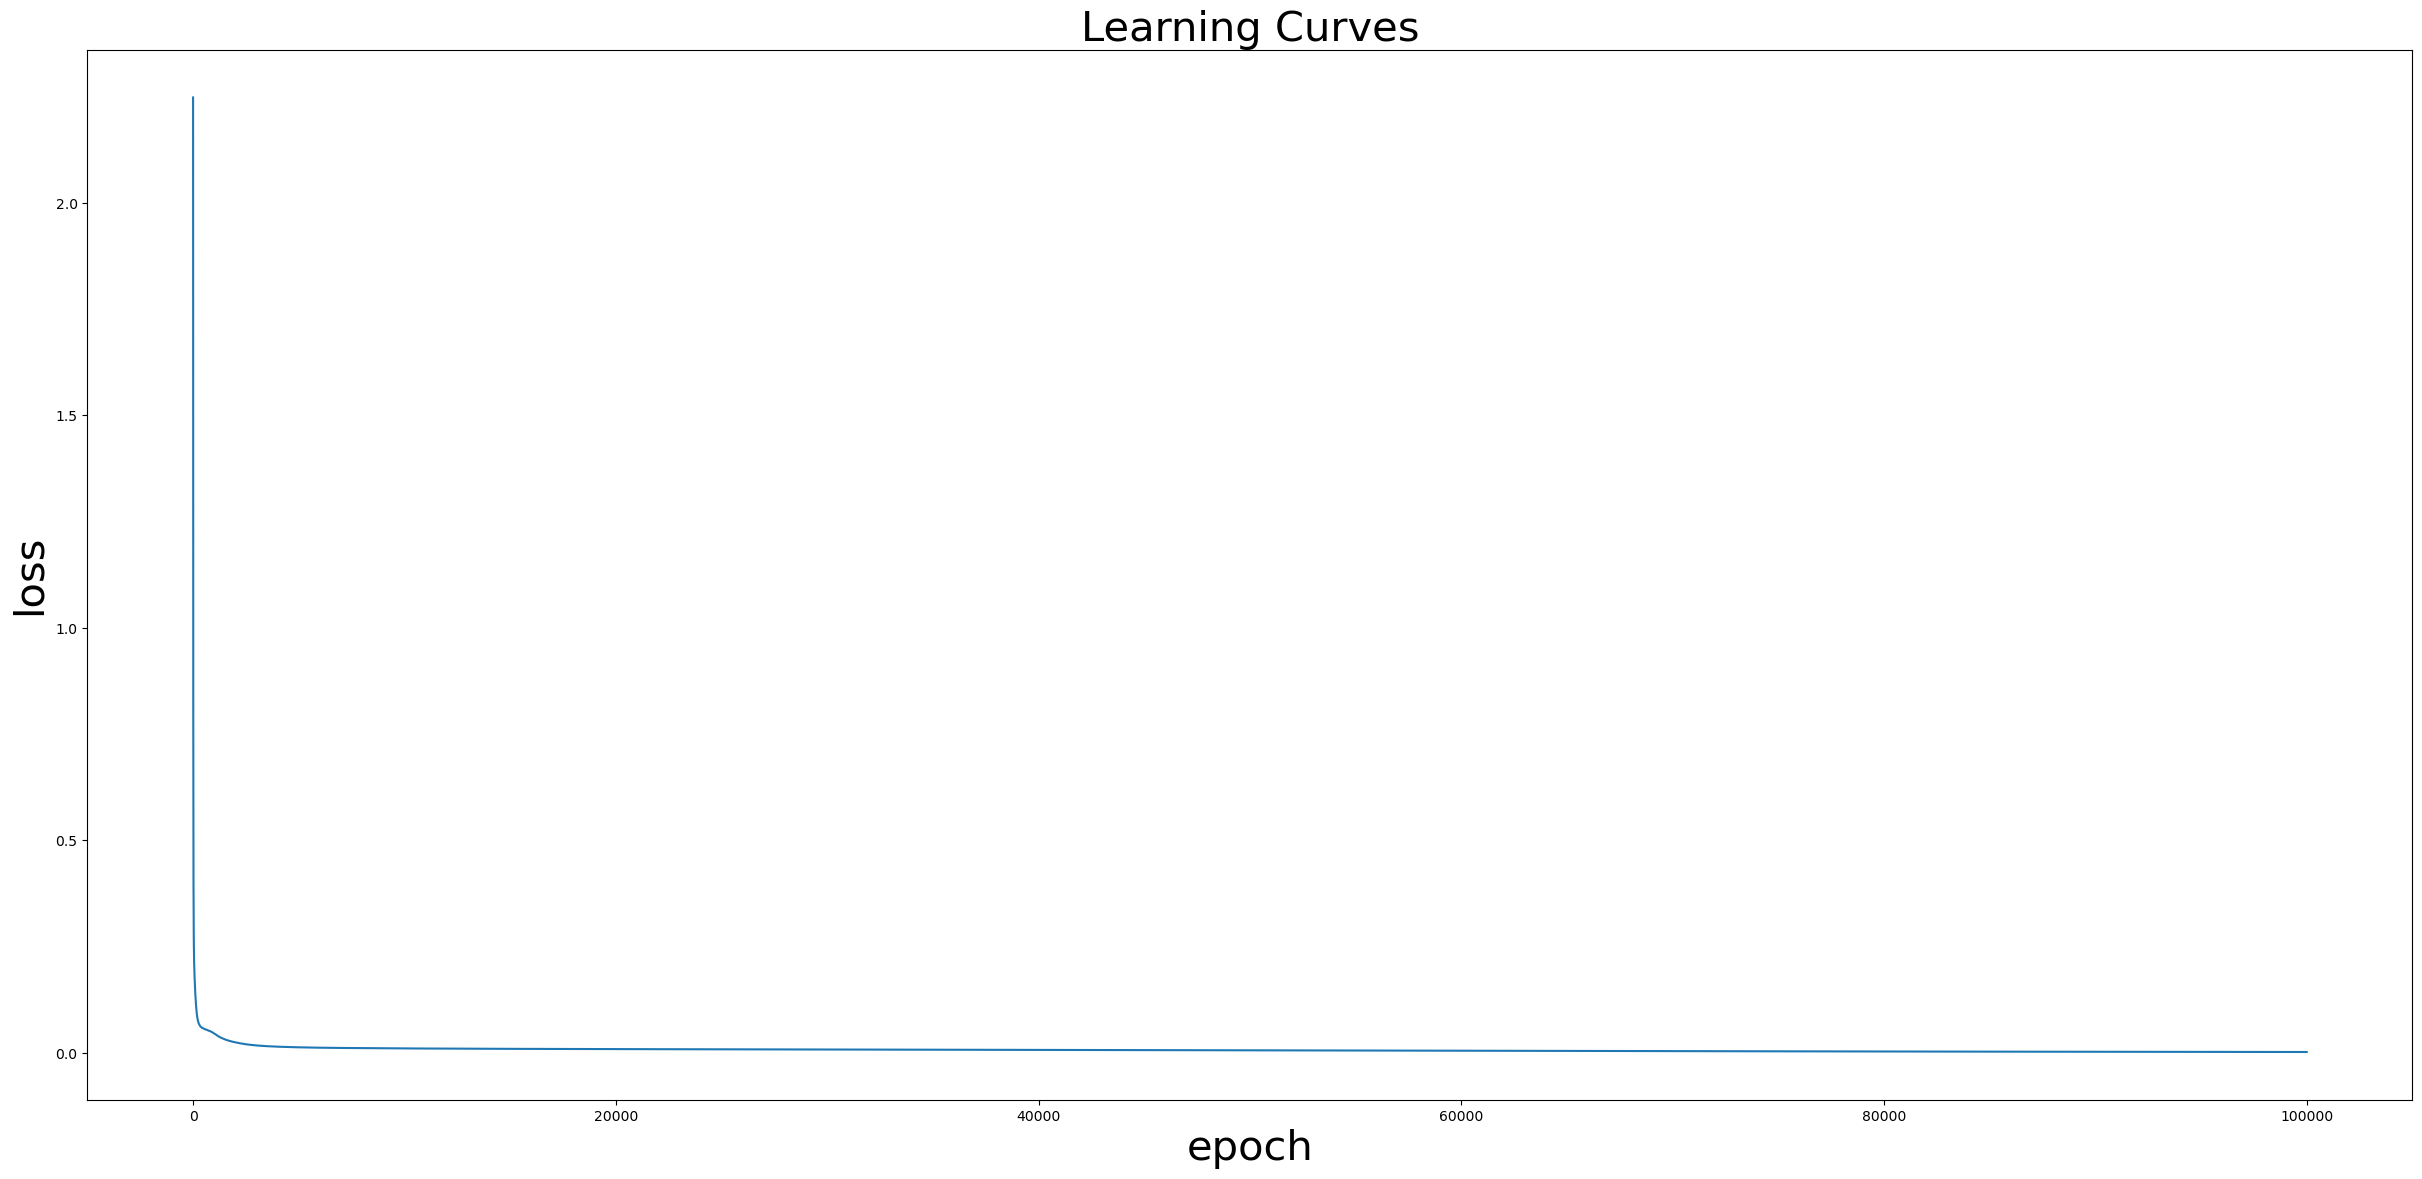

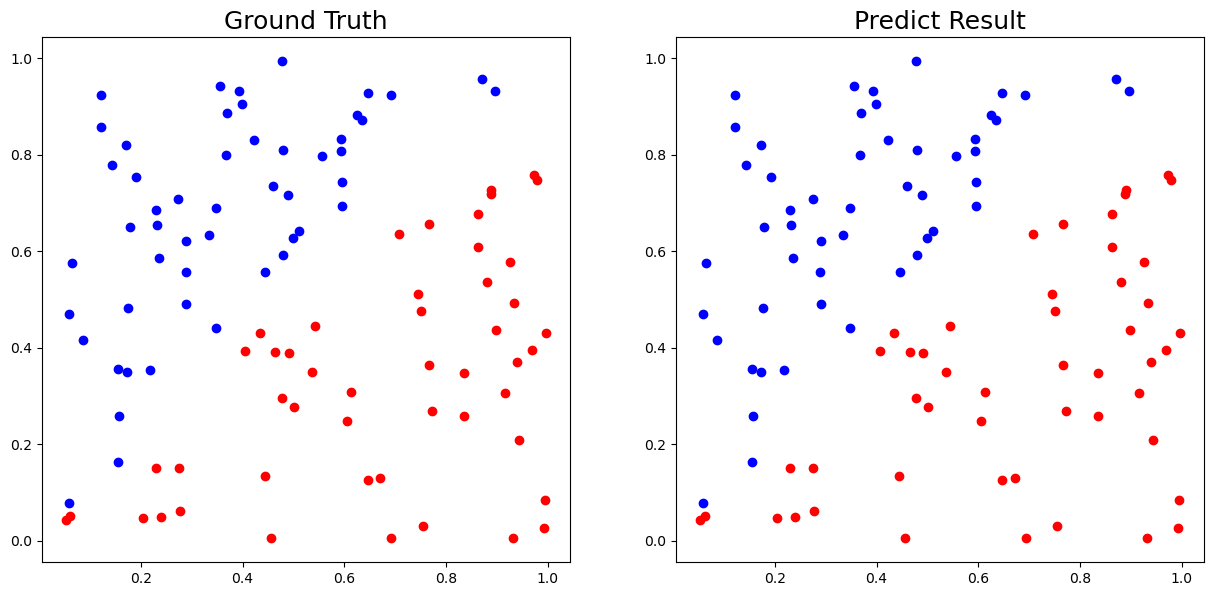

Iter 1  |    Ground truth:  [1]  |   prediction:  [1.001495]  |
Iter 2  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 3  |    Ground truth:  [1]  |   prediction:  [1.00455956]  |
Iter 4  |    Ground truth:  [1]  |   prediction:  [0.99698791]  |
Iter 5  |    Ground truth:  [1]  |   prediction:  [0.99805579]  |
Iter 6  |    Ground truth:  [1]  |   prediction:  [0.99921676]  |
Iter 7  |    Ground truth:  [1]  |   prediction:  [0.99532328]  |
Iter 8  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 9  |    Ground truth:  [1]  |   prediction:  [0.99738945]  |
Iter 10  |    Ground truth:  [1]  |   prediction:  [0.99512694]  |
Iter 11  |    Ground truth:  [1]  |   prediction:  [0.99609166]  |
Iter 12  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 13  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 14  |    Ground truth:  [1]  |   prediction:  [1.00596812]  |
Iter 15  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 16  |    Ground truth:  [0]  |   predicti

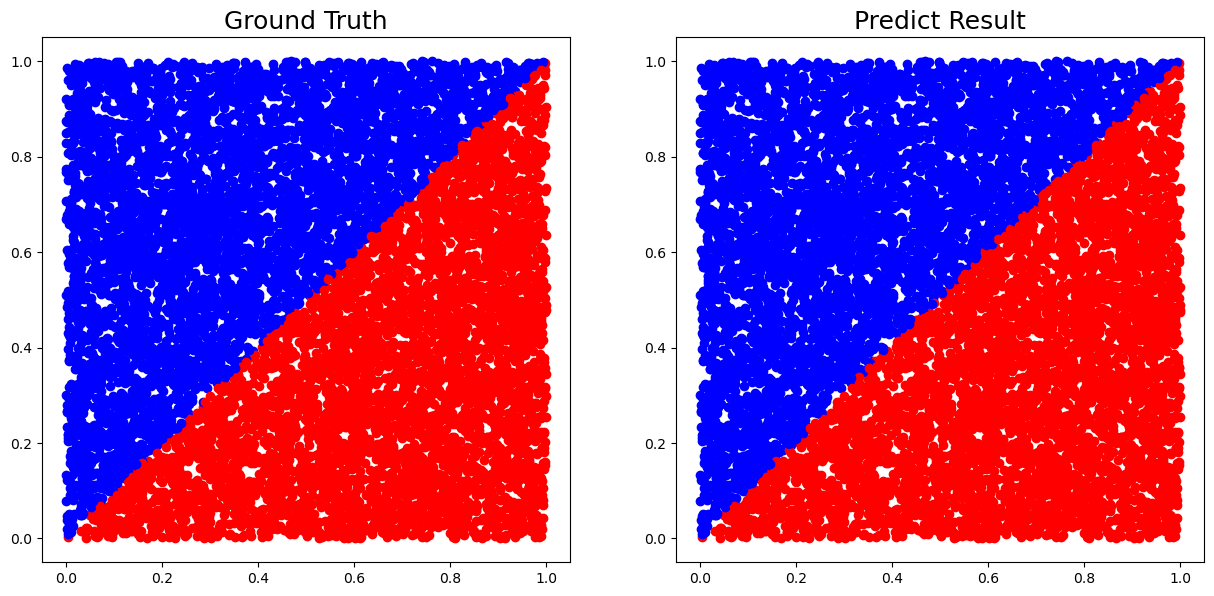

Iter 1  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 2  |    Ground truth:  [1]  |   prediction:  [0.99863226]  |
Iter 3  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 4  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 5  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 6  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 7  |    Ground truth:  [1]  |   prediction:  [1.00388766]  |
Iter 8  |    Ground truth:  [1]  |   prediction:  [0.99566165]  |
Iter 9  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 10  |    Ground truth:  [1]  |   prediction:  [1.00128008]  |
Iter 11  |    Ground truth:  [1]  |   prediction:  [0.99831033]  |
Iter 12  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 13  |    Ground truth:  [1]  |   prediction:  [0.99640321]  |
Iter 14  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 15  |    Ground truth:  [1]  |   prediction:  [1.00408681]  |
Iter 16  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 17  

In [88]:
x2, y2 = generate_linear()
model = MLP(hidden_size = 5,activate = "ReLU", learning_rate = 0.1)
model.train(x2, y2, epoch = 100000)
testx, testy = generate_linear(n = 10000)
model.test(testx, testy)

epoch  0  loss :  12.948832890586852
epoch  5000  loss :  0.08304365947760413
epoch  10000  loss :  0.08304365947760387
epoch  15000  loss :  0.08304365947760381
epoch  20000  loss :  0.08304365947760381
epoch  25000  loss :  0.08304365947760381
epoch  30000  loss :  0.08304365947760381
epoch  35000  loss :  0.08304365947760381
epoch  40000  loss :  0.08304365947760381
epoch  45000  loss :  0.08304365947760381
epoch  50000  loss :  0.08304365947760381
epoch  55000  loss :  0.08304365947760381
epoch  60000  loss :  0.08304365947760381
epoch  65000  loss :  0.08304365947760381
epoch  70000  loss :  0.08304365947760381
epoch  75000  loss :  0.08304365947760381
epoch  80000  loss :  0.08304365947760381
epoch  85000  loss :  0.08304365947760381
epoch  90000  loss :  0.08304365947760381
epoch  95000  loss :  0.08304365947760381


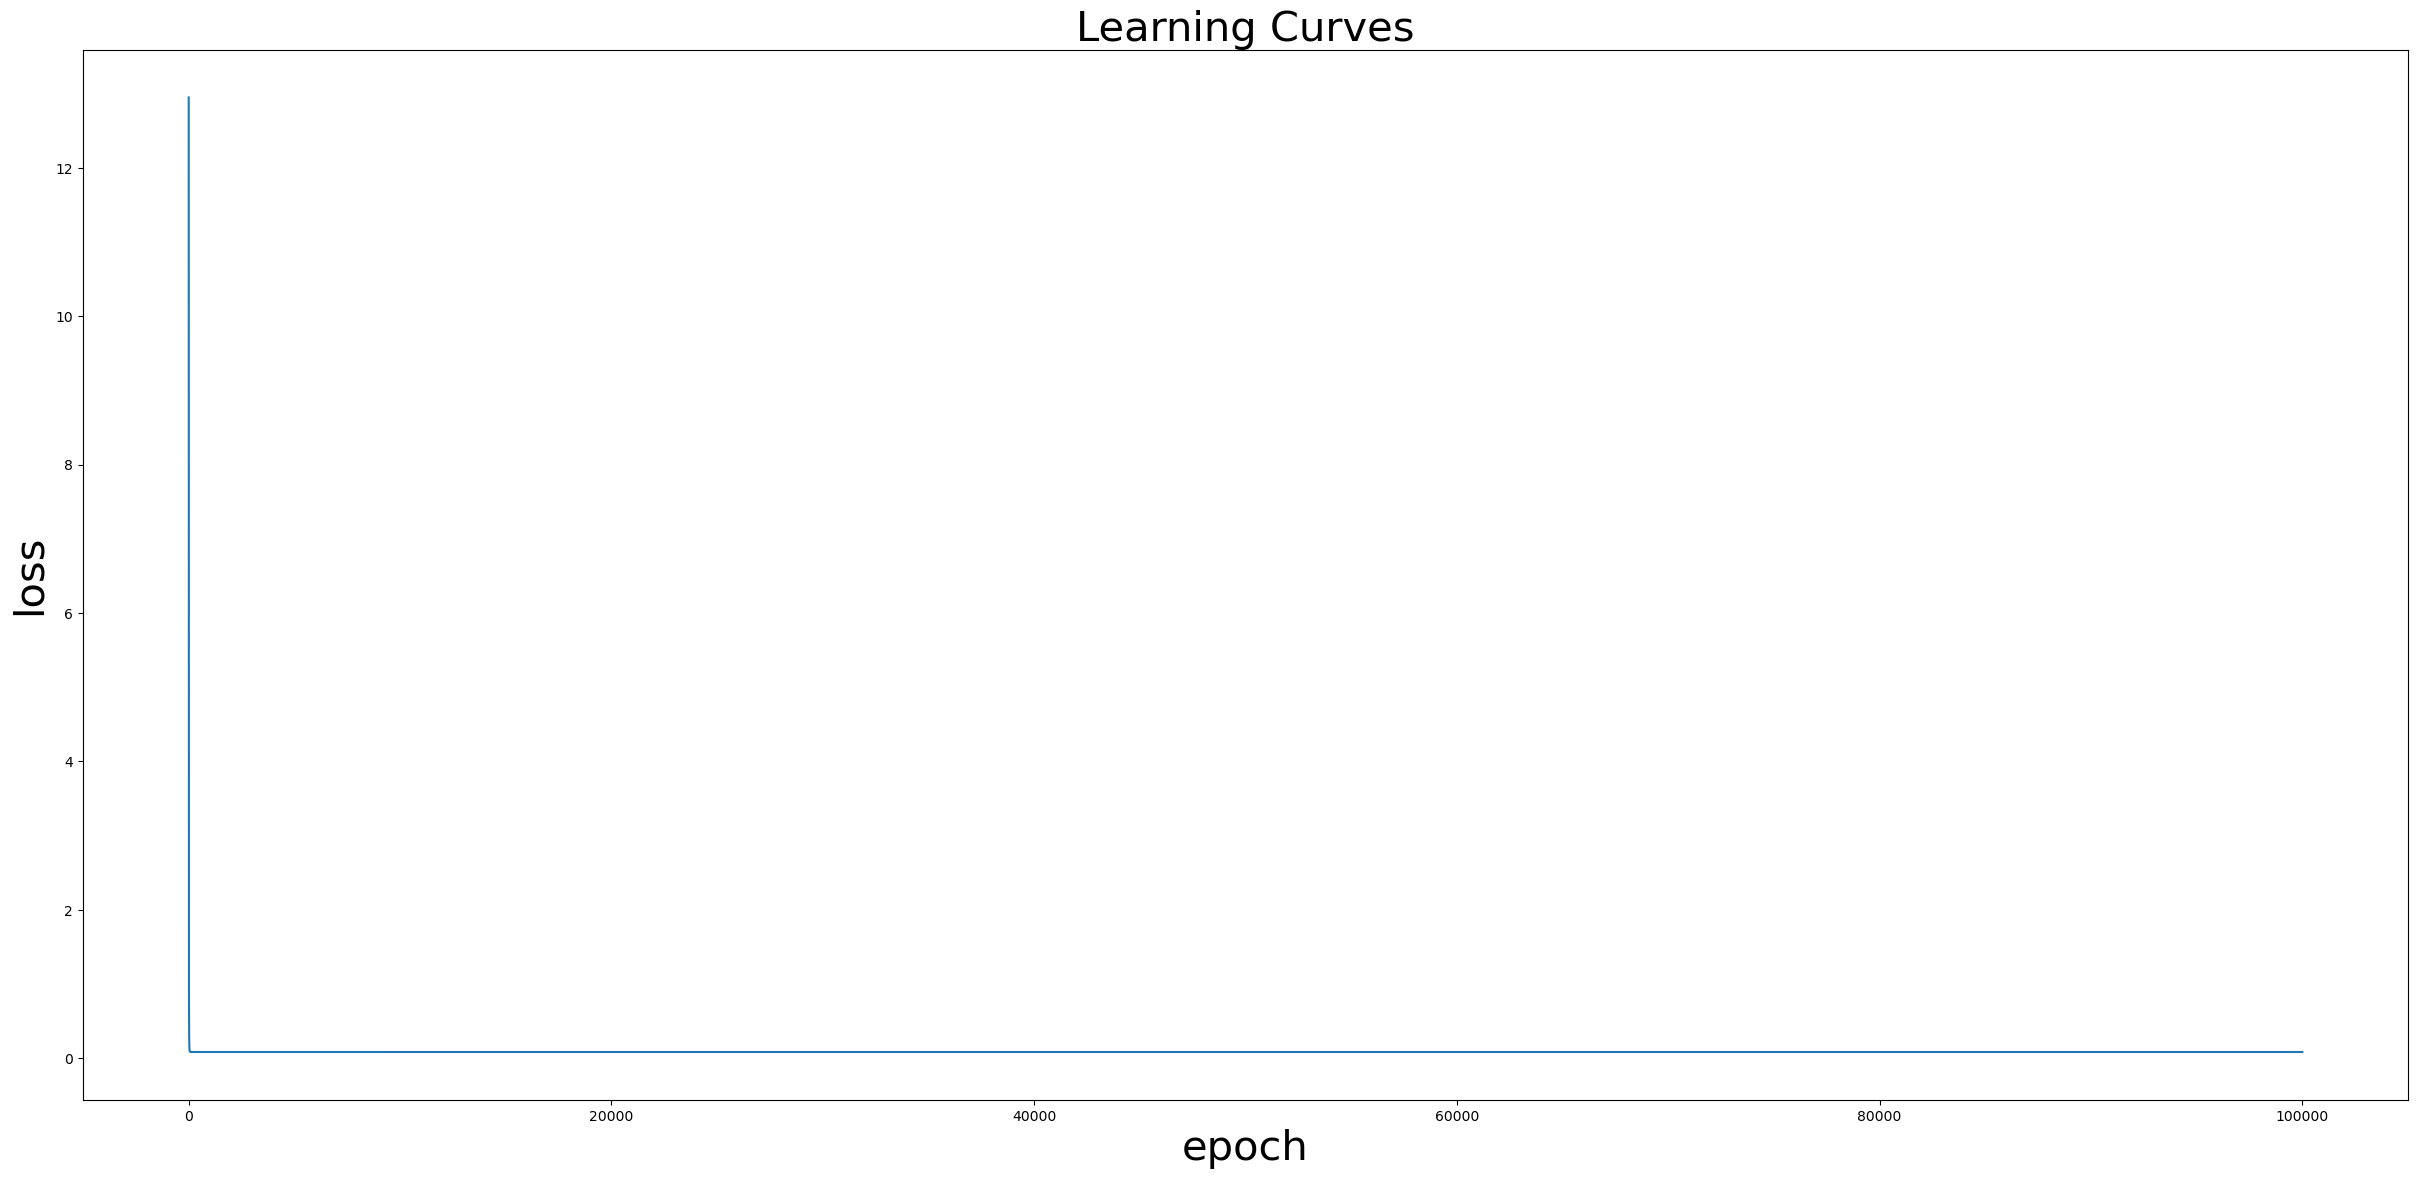

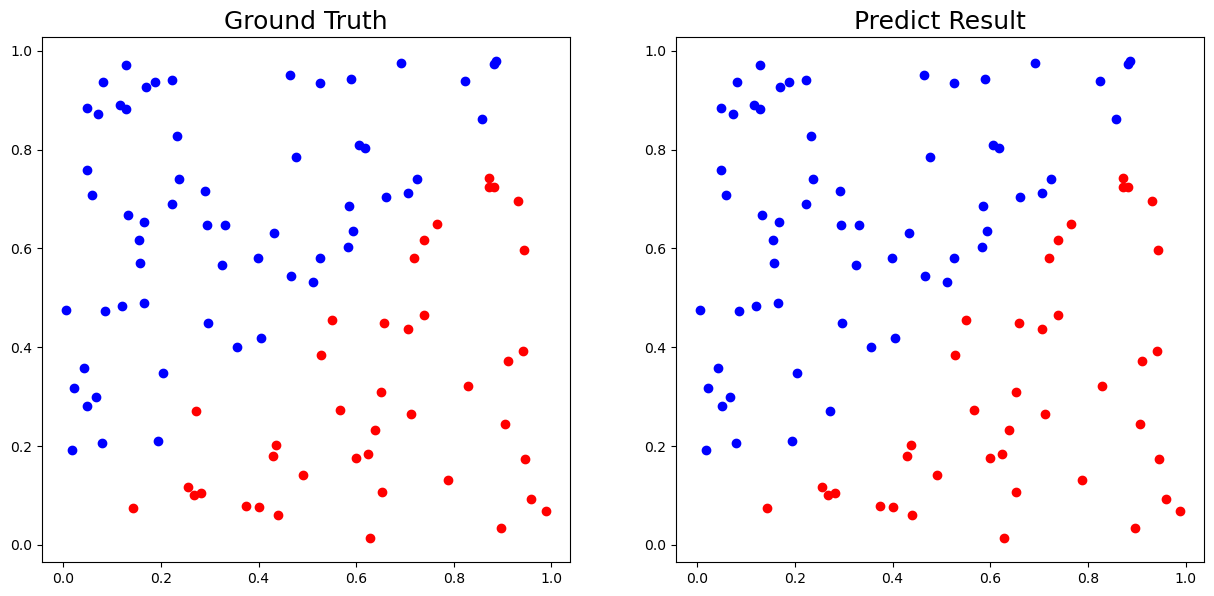

Iter 1  |    Ground truth:  [1]  |   prediction:  [1.29210099]  |
Iter 2  |    Ground truth:  [0]  |   prediction:  [-0.32225011]  |
Iter 3  |    Ground truth:  [1]  |   prediction:  [0.73555279]  |
Iter 4  |    Ground truth:  [0]  |   prediction:  [0.21798745]  |
Iter 5  |    Ground truth:  [1]  |   prediction:  [0.60211935]  |
Iter 6  |    Ground truth:  [0]  |   prediction:  [0.30069663]  |
Iter 7  |    Ground truth:  [0]  |   prediction:  [-0.27031035]  |
Iter 8  |    Ground truth:  [0]  |   prediction:  [0.50374561]  |
Iter 9  |    Ground truth:  [0]  |   prediction:  [0.41151945]  |
Iter 10  |    Ground truth:  [1]  |   prediction:  [1.01508407]  |
Iter 11  |    Ground truth:  [1]  |   prediction:  [0.92034358]  |
Iter 12  |    Ground truth:  [1]  |   prediction:  [0.64048466]  |
Iter 13  |    Ground truth:  [1]  |   prediction:  [0.85525288]  |
Iter 14  |    Ground truth:  [1]  |   prediction:  [1.03050751]  |
Iter 15  |    Ground truth:  [0]  |   prediction:  [0.05097078]  |
It

In [413]:
x2, y2 = generate_linear()
model = MLP(hidden_size = 3,activate = "none", learning_rate = 1e-2)
model.train(x2, y2, epoch = 100000)

epoch  0  loss :  18.499734411140444
epoch  5000  loss :  0.3005989787344996
epoch  10000  loss :  0.2785285295670828
epoch  15000  loss :  0.2685691535110954
epoch  20000  loss :  0.2630781768052016
epoch  25000  loss :  0.2596718110630188
epoch  30000  loss :  0.25738894797287404
epoch  35000  loss :  0.2557740854886236
epoch  40000  loss :  0.25458566121275894
epoch  45000  loss :  0.25368446296231034
epoch  50000  loss :  0.25298494918095016
epoch  55000  loss :  0.25243180895407225
epoch  60000  loss :  0.25198776707452997
epoch  65000  loss :  0.2516268301227043
epoch  70000  loss :  0.2513303473705192
epoch  75000  loss :  0.2510846109589962
epoch  80000  loss :  0.2508793382075476
epoch  85000  loss :  0.25070668019798115
epoch  90000  loss :  0.25056055549856976
epoch  95000  loss :  0.25043619103240233


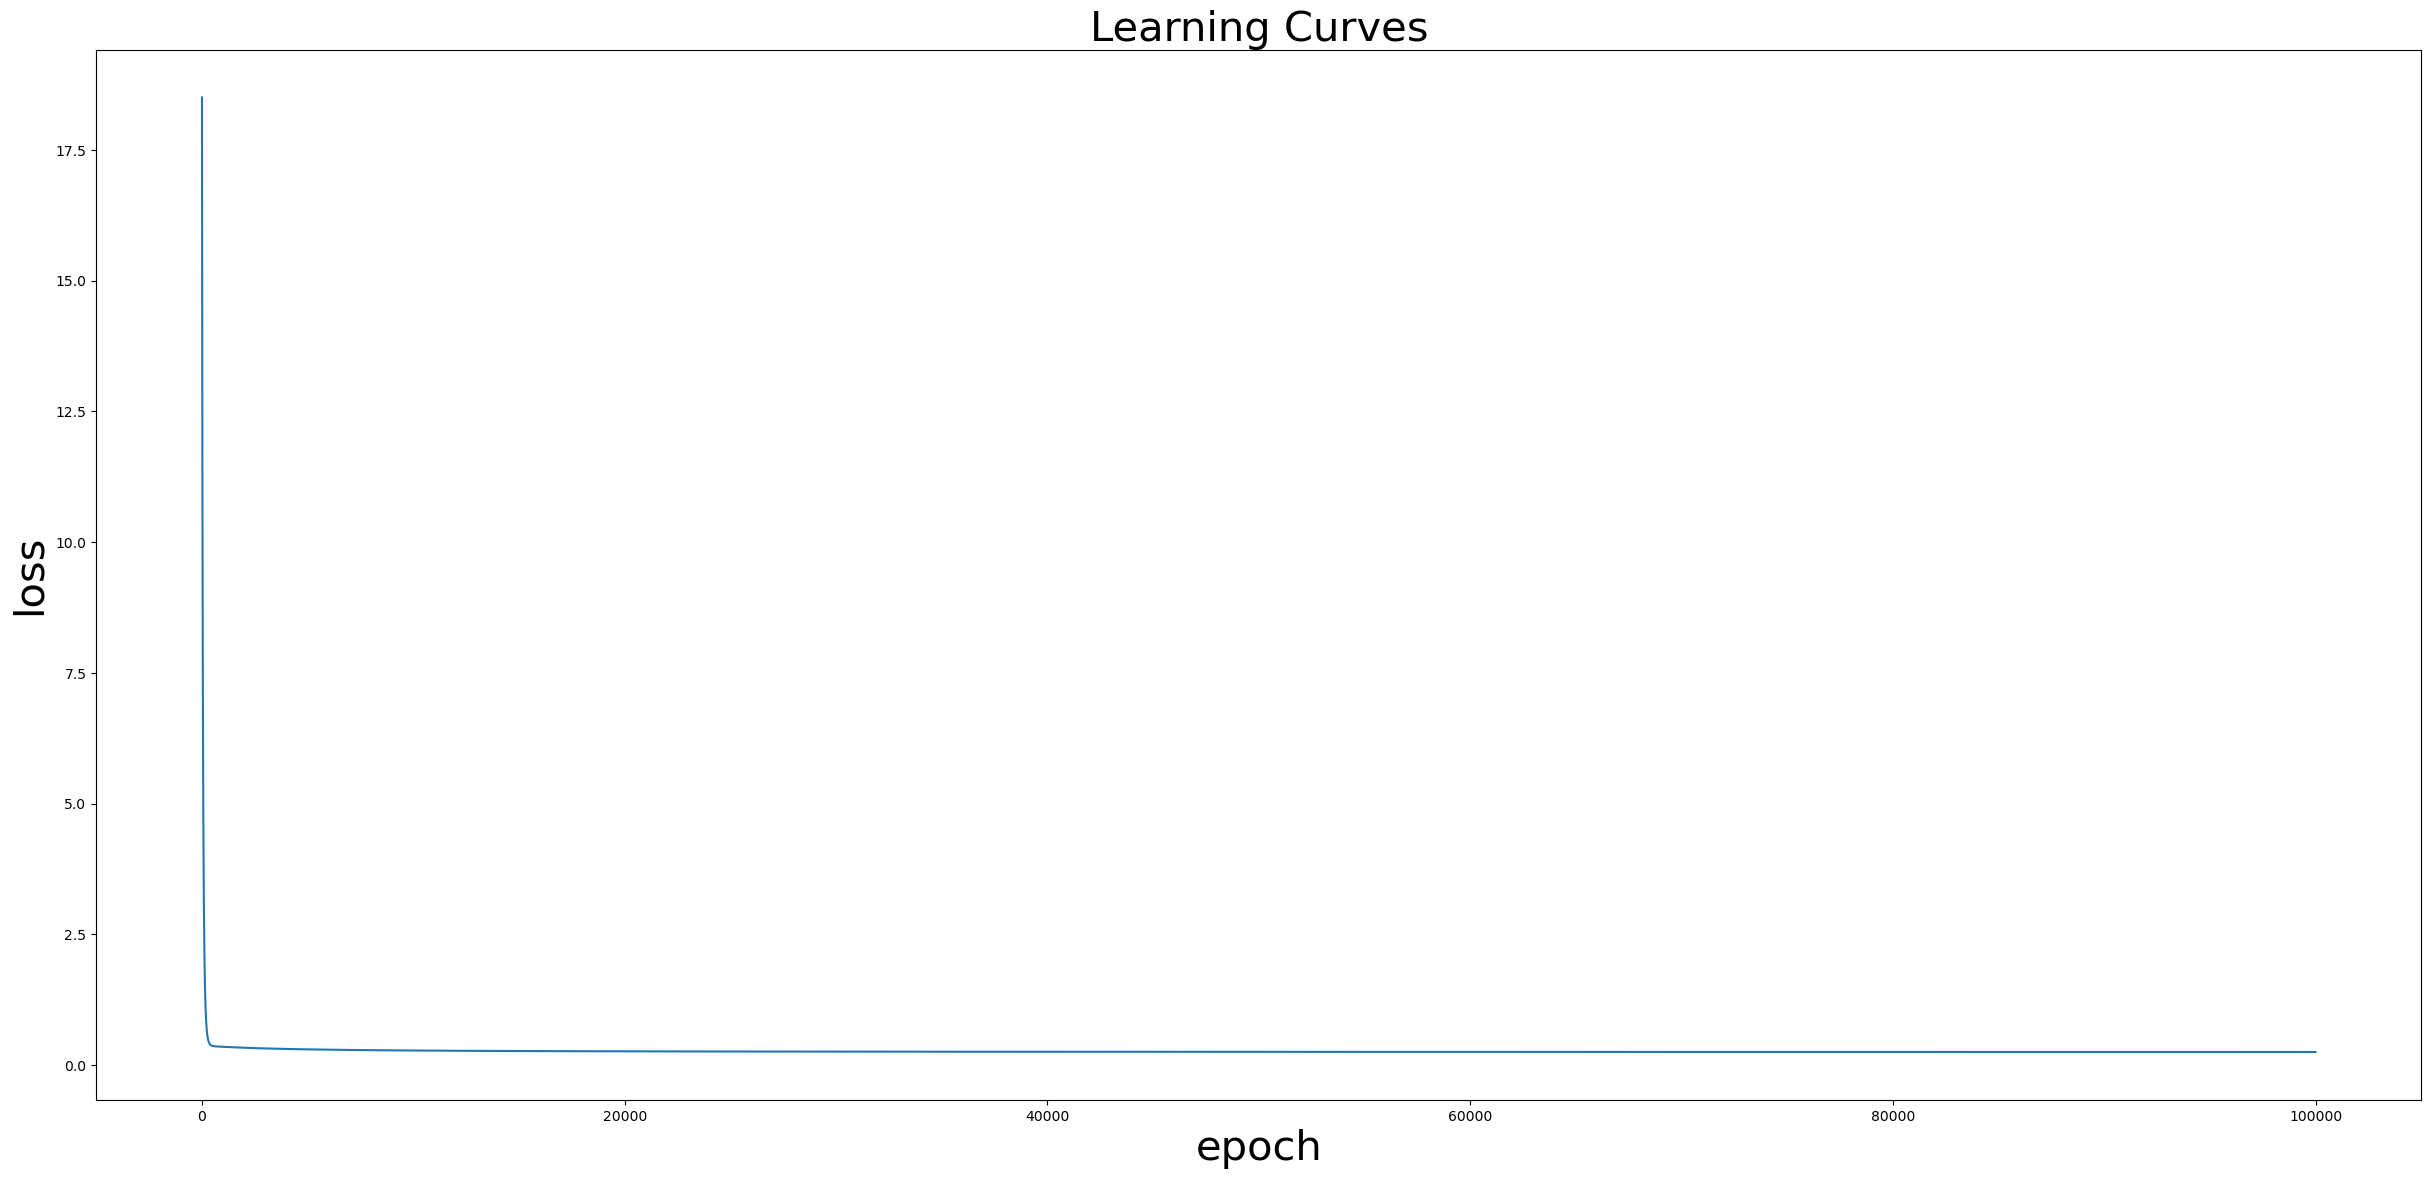

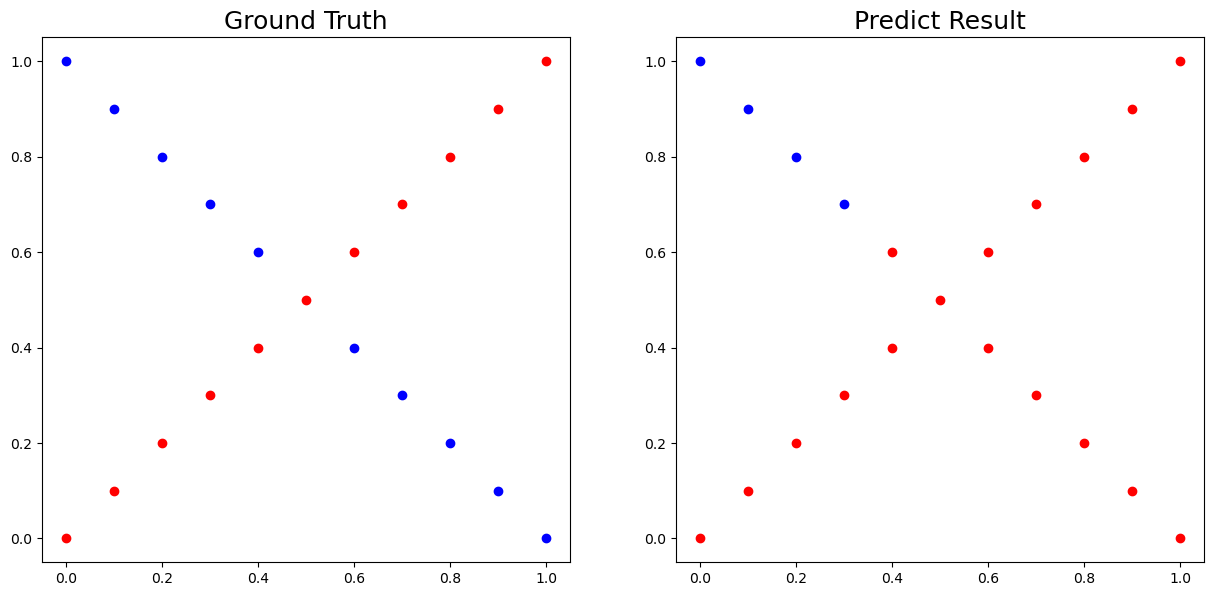

Iter 1  |    Ground truth:  [0]  |   prediction:  [0.4998498]  |
Iter 2  |    Ground truth:  [1]  |   prediction:  [0.54280804]  |
Iter 3  |    Ground truth:  [0]  |   prediction:  [0.4960906]  |
Iter 4  |    Ground truth:  [1]  |   prediction:  [0.53045719]  |
Iter 5  |    Ground truth:  [0]  |   prediction:  [0.4923314]  |
Iter 6  |    Ground truth:  [1]  |   prediction:  [0.51810634]  |
Iter 7  |    Ground truth:  [0]  |   prediction:  [0.4885722]  |
Iter 8  |    Ground truth:  [1]  |   prediction:  [0.5057555]  |
Iter 9  |    Ground truth:  [0]  |   prediction:  [0.484813]  |
Iter 10  |    Ground truth:  [1]  |   prediction:  [0.49340465]  |
Iter 11  |    Ground truth:  [0]  |   prediction:  [0.4810538]  |
Iter 12  |    Ground truth:  [0]  |   prediction:  [0.4772946]  |
Iter 13  |    Ground truth:  [1]  |   prediction:  [0.46870295]  |
Iter 14  |    Ground truth:  [0]  |   prediction:  [0.4735354]  |
Iter 15  |    Ground truth:  [1]  |   prediction:  [0.4563521]  |
Iter 16  |    G

In [449]:
x2, y2 = generate_XOR_easy()
model = MLP(hidden_size = 2,activate = "none", learning_rate = 1e-4)
model.train(x2, y2, epoch = 100000)